## Data Analysis

### Data Cleaning and Pre-Processing

In [44]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("2000-2022-std-rf.csv")

In [46]:
df.describe()

,RainFall Daily (mm)
count,6646.000000
mean,6.516807
std,15.950344
min,0.000000
25%,0.000000
50%,0.000000
75%,4.800000
max,300.100000


In [49]:
input_file = "2000-2022-std-rf.csv"
df = pd.read_csv(input_file)
df_cleaned = df.fillna(0)
output_file = 'corrected_data.csv'
df_cleaned.to_csv(output_file, index=False)
print(f"CSV file '{input_file}' successfully cleaned. Cleaned data saved to '{output_file} in the same directory :)'.")

CSV file '2000-2022-std-rf.csv' successfully cleaned. Cleaned data saved to 'corrected_data.csv in the same directory :)'.


In [50]:
df = pd.read_csv("corrected_data.csv")

In [51]:
df.describe()

,RainFall Daily (mm)
count,7761.000000
mean,5.580557
std,14.935977
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,300.100000


In [52]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [53]:
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2020-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
filtered_df.to_csv('filtered_file.csv', index=False)
print(filtered_df)

           Date  RainFall Daily (mm)
0    2000-01-01                  0.0
1    2000-01-02                  0.0
2    2000-01-03                  0.0
3    2000-01-04                  0.0
4    2000-01-05                  0.0
...         ...                  ...
7666 2020-12-27                  0.0
7667 2020-12-28                  0.0
7668 2020-12-29                  0.0
7669 2020-12-30                  0.0
7670 2020-12-31                  0.0

[7671 rows x 2 columns]


In [54]:
df = pd.read_csv("filtered_file.csv")
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index("Date",inplace = True)

### Calculating Monthly Average :

In [55]:
monthly_avg = df.resample('M').mean()
print(monthly_avg)
MA_pivot_table = monthly_avg.pivot_table(values='RainFall Daily (mm)', index=monthly_avg.index.month, columns=monthly_avg.index.year)
print(MA_pivot_table.head())

            RainFall Daily (mm)
Date                           
2000-01-31             0.000000
2000-02-29             0.206897
2000-03-31             0.000000
2000-04-30             4.400000
2000-05-31             2.400000
...                         ...
2020-08-31            22.516129
2020-09-30            15.900000
2020-10-31             3.951613
2020-11-30             2.370000
2020-12-31             0.958065

[252 rows x 1 columns]
Date      2000      2001      2002      2003       2004      2005      2006  \
Date                                                                          
1     0.000000  0.000000  0.000000  0.000000   0.387097  0.309677  0.470968   
2     0.206897  0.742857  0.000000  0.764286   0.000000  0.000000  0.000000   
3     0.000000  0.245161  0.541935  2.335484   0.716129  0.245161  3.303226   
4     4.400000  4.366667  0.986667  3.193333   1.540000  3.500000  1.493333   
5     2.400000  2.412903  5.296774  0.625806  11.083871  4.141935  9.651613   

Date  

In [56]:
MA_pivot_table = monthly_avg.pivot_table(values='RainFall Daily (mm)', index=monthly_avg.index.month, columns=monthly_avg.index.year)
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
MA_pivot_table.index = MA_pivot_table.index.map(month_names)
print(MA_pivot_table.head())
MA_pivot_table.to_csv("monthly_average.csv")

Date          2000      2001      2002      2003       2004      2005  \
Date                                                                    
January   0.000000  0.000000  0.000000  0.000000   0.387097  0.309677   
February  0.206897  0.742857  0.000000  0.764286   0.000000  0.000000   
March     0.000000  0.245161  0.541935  2.335484   0.716129  0.245161   
April     4.400000  4.366667  0.986667  3.193333   1.540000  3.500000   
May       2.400000  2.412903  5.296774  0.625806  11.083871  4.141935   

Date          2006      2007      2008      2009  ...      2011      2012  \
Date                                              ...                       
January   0.470968  0.009677  0.000000  0.000000  ...  0.000000  0.000000   
February  0.000000  0.000000  1.241379  0.000000  ...  7.292857  0.000000   
March     3.303226  0.000000  2.583871  3.393548  ...  0.000000  0.000000   
April     1.493333  3.113333  0.920000  0.026667  ...  6.340000  4.620000   
May       9.651613  1.6483

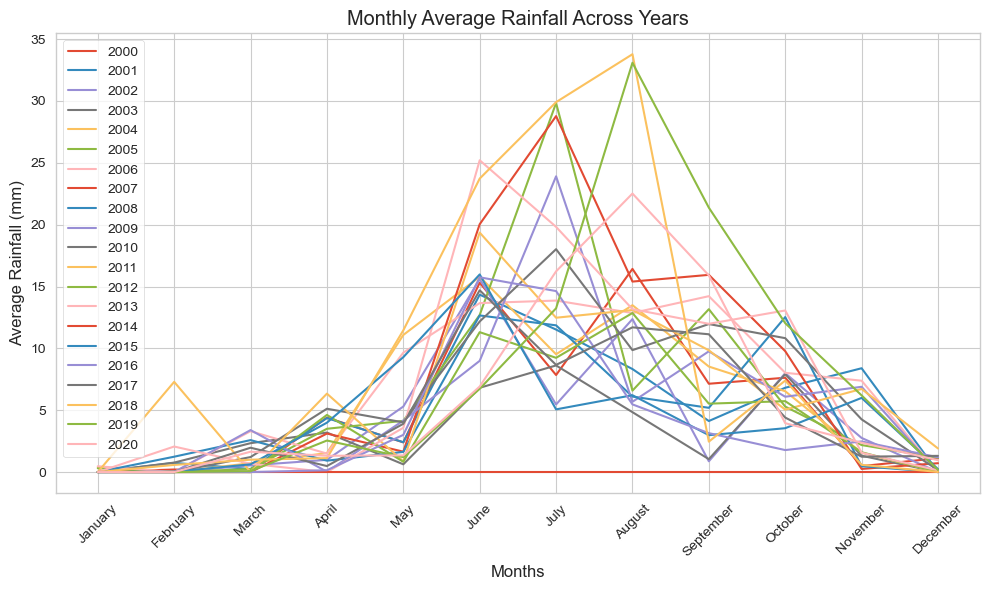

In [57]:
plt.figure(figsize=(10, 6))  # Set the figure size
for year in MA_pivot_table.columns:
    plt.plot(MA_pivot_table.index, MA_pivot_table[year], label=f'{year}')
plt.title('Monthly Average Rainfall Across Years')
plt.xlabel('Months')
plt.ylabel('Average Rainfall (mm)')
plt.legend()  # Add a legend to distinguish lines by year
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.savefig('average_monthly_rainfall.png')
plt.show()

### Yearly Analysis :

In [58]:
annual_avg = MA_pivot_table.mean()
print(annual_avg)

Date
2000    5.246077
2001    5.107953
2002    4.323987
2003    3.122750
2004    5.763790
2005    6.593145
2006    7.077849
2007    7.972706
2008    4.600088
2009    5.742670
2010    6.467527
2011    6.912747
2012    4.310116
2013    7.605232
2014    0.000000
2015    4.496870
2016    3.966443
2017    4.960394
2018    9.335571
2019    8.056066
2020    6.095708
dtype: float64


In [59]:
annual_avg = MA_pivot_table.mean()
annual_avg_df = pd.DataFrame({'Year': annual_avg.index, 'Avg Annual Rainfall': annual_avg.values})
annual_avg_df = annual_avg_df.sort_values('Year')
print(annual_avg_df)

    Year  Avg Annual Rainfall
0   2000             5.246077
1   2001             5.107953
2   2002             4.323987
3   2003             3.122750
4   2004             5.763790
5   2005             6.593145
6   2006             7.077849
7   2007             7.972706
8   2008             4.600088
9   2009             5.742670
10  2010             6.467527
11  2011             6.912747
12  2012             4.310116
13  2013             7.605232
14  2014             0.000000
15  2015             4.496870
16  2016             3.966443
17  2017             4.960394
18  2018             9.335571
19  2019             8.056066
20  2020             6.095708


In [60]:
import pandas as pd
import numpy as np

MA_pivot_table_no_zeros = MA_pivot_table.replace(0, np.nan)

annual_avg = MA_pivot_table.mean()
annual_min = MA_pivot_table_no_zeros.min().fillna(0)
annual_max = MA_pivot_table.max()
annual_var = MA_pivot_table.var()
annual_std = MA_pivot_table.std()
annual_sum = MA_pivot_table.sum()

annual_avg_df = pd.DataFrame({
    'Year': annual_avg.index, 
    'Avg Annual Rainfall': annual_avg.values, 
    'Min': annual_min.values, 
    'Max': annual_max.values, 
    'Variance': annual_var.values,
    'Standard Deviation': annual_std.values, 
    'Total': annual_sum.values
})

print(annual_avg_df)
annual_avg_df.to_csv("Annual_Analysis.csv", index=False)


    Year  Avg Annual Rainfall       Min        Max    Variance  \
0   2000             5.246077  0.206897  16.425806   33.743437   
1   2001             5.107953  0.245161  14.343333   23.104014   
2   2002             4.323987  0.541935  15.603333   27.593066   
3   2003             3.122750  0.625806   8.619355    9.933093   
4   2004             5.763790  0.387097  15.793333   33.386977   
5   2005             6.593145  0.245161  29.838710   73.672381   
6   2006             7.077849  0.470968  14.220000   33.700036   
7   2007             7.972706  0.009677  28.777419   96.973749   
8   2008             4.600088  0.473333  12.663333   25.479031   
9   2009             5.742670  0.026667  23.909677   45.256442   
10  2010             6.467527  0.154839  18.019355   35.503027   
11  2011             6.912747  0.864516  19.360000   35.813783   
12  2012             4.310116  0.832258  12.858065   22.151114   
13  2013             7.605232  0.135484  25.206667   76.550614   
14  2014  

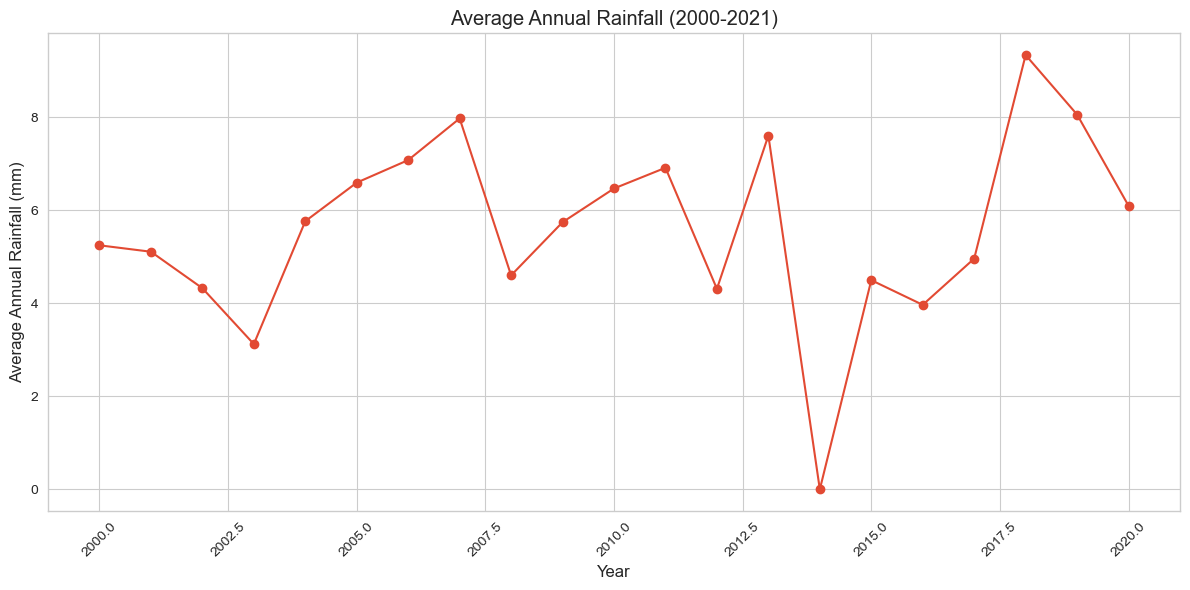

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_df['Year'], annual_avg_df['Avg Annual Rainfall'], marker='o')
plt.title('Average Annual Rainfall (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Average Annual Rainfall (mm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('average_annual_rainfall.png')
plt.show()

### Solutions!

In [62]:
import pandas as pd
file_path = 'filtered_file.csv'
df = pd.read_csv(file_path)
print(df.head())
print("Columns:", df.columns)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
else:
    print("Error: 'Date' column not found in the DataFrame.")
    exit()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
monthly_avg = df.groupby(['Year', 'Month'])['RainFall Daily (mm)'].mean().reset_index()
new_pivot_table = monthly_avg.pivot(index='Month', columns='Year', values='RainFall Daily (mm)')
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
new_pivot_table.index = new_pivot_table.index.map(month_names)
new_pivot_table = new_pivot_table.reindex(month_names.values())
new_pivot_table.to_csv("idksomerandompivottable.csv")
print(new_pivot_table.head())
print("Shape of the pivot table:", new_pivot_table.shape)
overall_monthly_avg = new_pivot_table.mean(axis=1)
print("Overall monthly average rainfall:")
print(overall_monthly_avg)

         Date  RainFall Daily (mm)
0  2000-01-01                  0.0
1  2000-01-02                  0.0
2  2000-01-03                  0.0
3  2000-01-04                  0.0
4  2000-01-05                  0.0
Columns: Index(['Date', 'RainFall Daily (mm)'], dtype='object')
Year          2000      2001      2002      2003       2004      2005  \
Month                                                                   
January   0.000000  0.000000  0.000000  0.000000   0.387097  0.309677   
February  0.206897  0.742857  0.000000  0.764286   0.000000  0.000000   
March     0.000000  0.245161  0.541935  2.335484   0.716129  0.245161   
April     4.400000  4.366667  0.986667  3.193333   1.540000  3.500000   
May       2.400000  2.412903  5.296774  0.625806  11.083871  4.141935   

Year          2006      2007      2008      2009  ...      2011      2012  \
Month                                             ...                       
January   0.470968  0.009677  0.000000  0.000000  ...  0.000

### Calculating Seasonal Average :

In [63]:
print(df.head())
print("Columns:", df.columns)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
else:
    print("Error: 'Date' column not found in the DataFrame.")
    exit()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
monthly_avg = df.groupby(['Year', 'Month'])['RainFall Daily (mm)'].mean().reset_index()

        Date  RainFall Daily (mm)  Month  Year
0 2000-01-01                  0.0      1  2000
1 2000-01-02                  0.0      1  2000
2 2000-01-03                  0.0      1  2000
3 2000-01-04                  0.0      1  2000
4 2000-01-05                  0.0      1  2000
Columns: Index(['Date', 'RainFall Daily (mm)', 'Month', 'Year'], dtype='object')


In [64]:
seasons = {
    "Pre Monsoon" : [3,4,5],
    "SW Monsoon" : [6,7,8,9],
    "NE Monsoon" : [10,11],
    "Non Monsoon" : [12,1,2],
}
def get_season(month):
    for i, j in seasons.items():
        if month in j:
            return i
    return None

df['Season'] = df['Month'].apply(get_season)
seasonal_avg = df.groupby('Season')['RainFall Daily (mm)'].mean().reindex(['Pre Monsoon', 'SW Monsoon', 'NE Monsoon', 'Non Monsoon'])
seasonal_avg.to_csv("seasonal_average.csv")
print(seasonal_avg)

Season
Pre Monsoon     2.419306
SW Monsoon     12.238720
NE Monsoon      5.058236
Non Monsoon     0.359283
Name: RainFall Daily (mm), dtype: float64


In [65]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Define the seasons and their corresponding months
seasons = {
    "Pre Monsoon": [3, 4, 5],
    "SW Monsoon": [6, 7, 8, 9],
    "NE Monsoon": [10, 11],
    "Non Monsoon": [12, 1, 2],
}

# Function to map months to seasons
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season
    return None
df['Season'] = df['Month'].apply(get_season)
seasonal_avg = df.groupby(['Year', 'Season'])['RainFall Daily (mm)'].mean().reset_index()
SA_pivot_table = seasonal_avg.pivot_table(index='Season', columns='Year', values='RainFall Daily (mm)')
SA_pivot_table = SA_pivot_table.reindex(columns=range(2000, 2021))
SA_pivot_table.to_csv("seasonal_average_by_year.csv")
print(SA_pivot_table)
SA_pivot_table.to_csv("seasonal_average.csv")

Year              2000      2001      2002      2003       2004       2005  \
Season                                                                       
NE Monsoon    4.111475  7.591803  5.419672  4.672131   4.091803   3.763934   
Non Monsoon   0.448352  0.231111  0.000000  0.237778   0.131868   0.504444   
Pre Monsoon   2.243478  2.319565  2.289130  2.039130   4.478261   2.619565   
SW Monsoon   11.686885  9.585246  8.582787  5.352459  11.828689  15.615574   

Year              2006       2007      2008       2009  ...       2011  \
Season                                                  ...              
NE Monsoon    7.711475   5.091803  6.600000   6.485246  ...   5.868852   
Non Monsoon   0.162222   0.250000  0.395604   0.000000  ...   2.926667   
Pre Monsoon   4.852174   1.570652  1.720652   2.554348  ...   2.358696   
SW Monsoon   13.645902  20.072951  8.955738  12.131148  ...  13.680328   

Year             2012       2013  2014      2015      2016       2017  \
Season       

In [66]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'filtered_file.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check the first few rows and columns of the DataFrame
print(df.head())
print("Columns:", df.columns)

# Ensure the 'Date' column is in datetime format with the correct format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
else:
    print("Error: 'Date' column not found in the DataFrame.")
    exit()

# Extract month and year from the Date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by Month and Year, then calculate the average rainfall
monthly_avg = df.groupby(['Year', 'Month'])['RainFall Daily (mm)'].mean().reset_index()

# Create a pivot table
new_pivot_table = monthly_avg.pivot(index='Month', columns='Year', values='RainFall Daily (mm)')

# Create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace the index (month numbers) with month names
new_pivot_table.index = new_pivot_table.index.map(month_names)

# Sort the index to ensure months are in the correct order
new_pivot_table = new_pivot_table.reindex(month_names.values())

# Save the pivot table to a CSV file
new_pivot_table.to_csv("idksomerandompivottable.csv")

print(new_pivot_table.head())
print("Shape of the pivot table:", new_pivot_table.shape)

# Calculate the overall monthly average across all years
overall_monthly_avg = new_pivot_table.mean(axis=1)
print("Overall monthly average rainfall:")
print(overall_monthly_avg)


         Date  RainFall Daily (mm)
0  2000-01-01                  0.0
1  2000-01-02                  0.0
2  2000-01-03                  0.0
3  2000-01-04                  0.0
4  2000-01-05                  0.0
Columns: Index(['Date', 'RainFall Daily (mm)'], dtype='object')
Year          2000      2001      2002      2003       2004      2005  \
Month                                                                   
January   0.000000  0.000000  0.000000  0.000000   0.387097  0.309677   
February  0.206897  0.742857  0.000000  0.764286   0.000000  0.000000   
March     0.000000  0.245161  0.541935  2.335484   0.716129  0.245161   
April     4.400000  4.366667  0.986667  3.193333   1.540000  3.500000   
May       2.400000  2.412903  5.296774  0.625806  11.083871  4.141935   

Year          2006      2007      2008      2009  ...      2011      2012  \
Month                                             ...                       
January   0.470968  0.009677  0.000000  0.000000  ...  0.000

In [67]:
print(df)

           Date  RainFall Daily (mm)  Month  Year
0    2000-01-01                  0.0      1  2000
1    2000-01-02                  0.0      1  2000
2    2000-01-03                  0.0      1  2000
3    2000-01-04                  0.0      1  2000
4    2000-01-05                  0.0      1  2000
...         ...                  ...    ...   ...
7666 2020-12-27                  0.0     12  2020
7667 2020-12-28                  0.0     12  2020
7668 2020-12-29                  0.0     12  2020
7669 2020-12-30                  0.0     12  2020
7670 2020-12-31                  0.0     12  2020

[7671 rows x 4 columns]


In [68]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

### Plotting Graphs:

In [69]:
df = pd.read_csv('Annual_Analysis.csv')

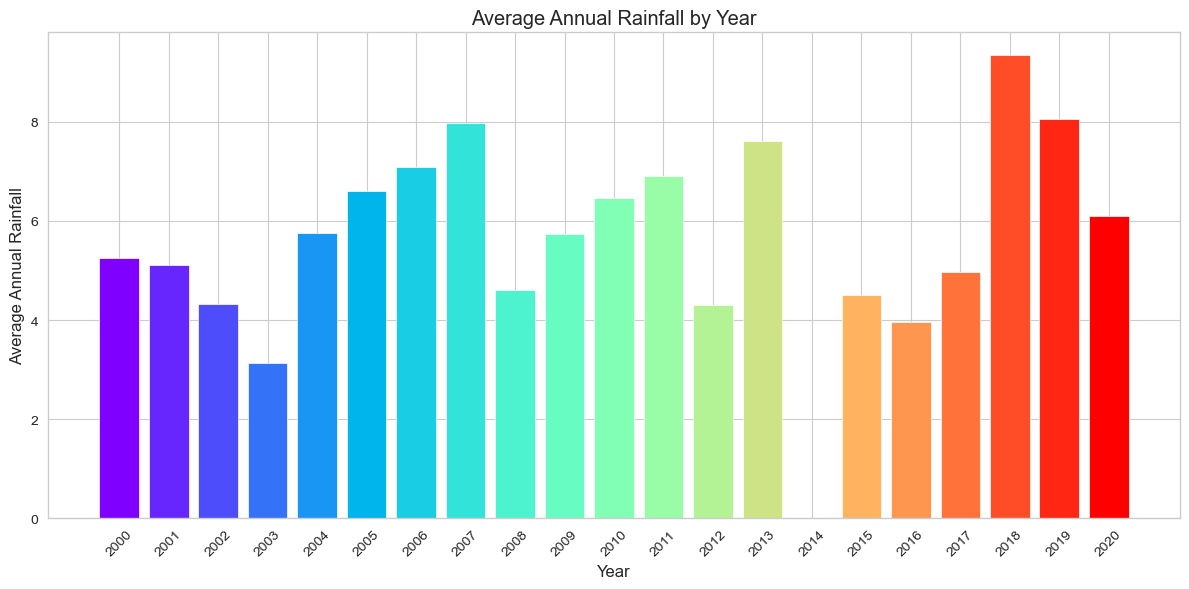

In [70]:
plt.figure(figsize=(12, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(df)))  # Generate rainbow colors
plt.bar(df['Year'], df['Avg Annual Rainfall'], color=colors)
plt.xticks(df['Year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Average Annual Rainfall')
plt.title('Average Annual Rainfall by Year')
plt.tight_layout()
plt.show()

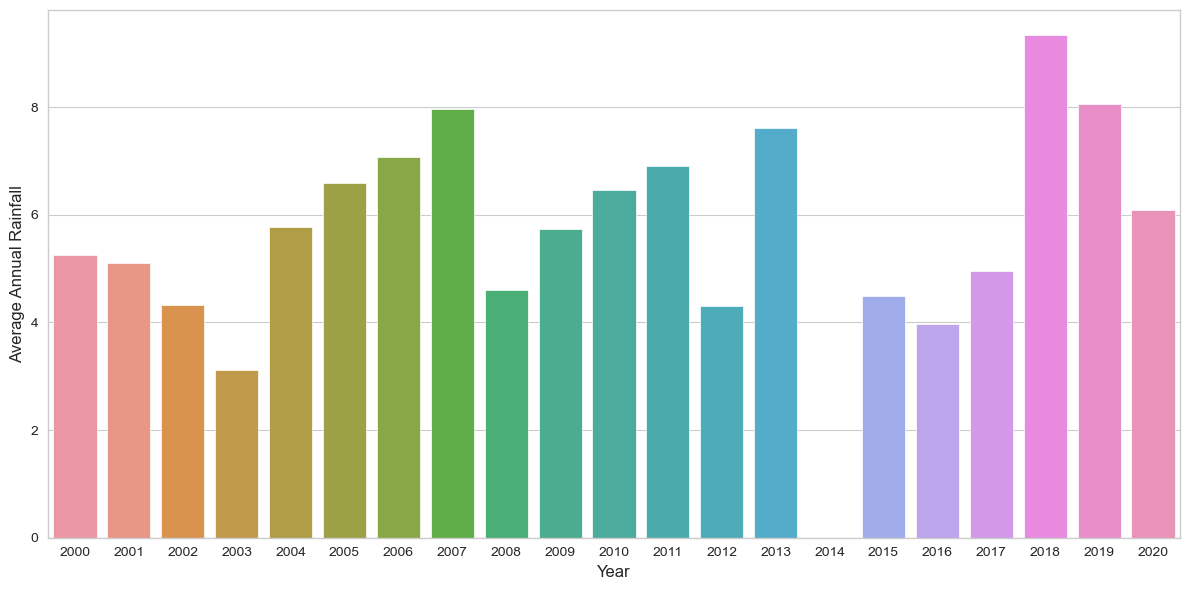

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Avg Annual Rainfall', data=df, orient='v')
plt.ylabel('Average Annual Rainfall')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

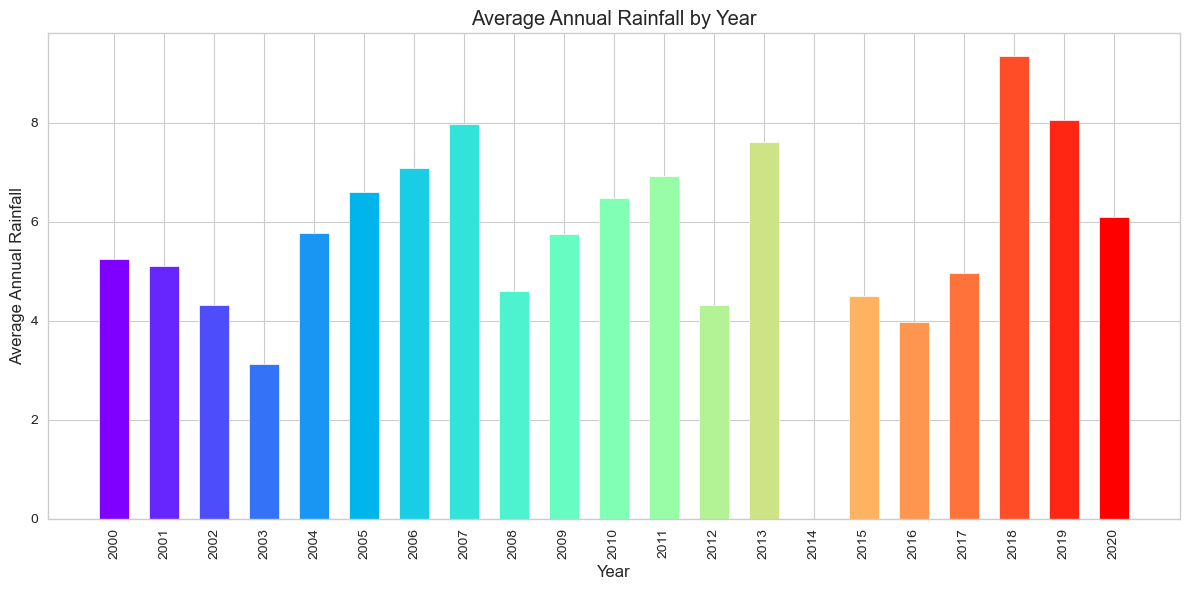

In [72]:
plt.figure(figsize=(12, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(df)))  # Generate rainbow colors
plt.bar(df['Year'], df['Avg Annual Rainfall'], color=colors, width=0.59)  # Use bar for vertical bars with adjusted width
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Average Annual Rainfall')  # Label the y-axis
plt.title('Average Annual Rainfall by Year')
plt.xticks(df['Year'], rotation=90)  # Ensure all years are shown on the x-axis with a 90 degree rotation
plt.tight_layout()
plt.show()

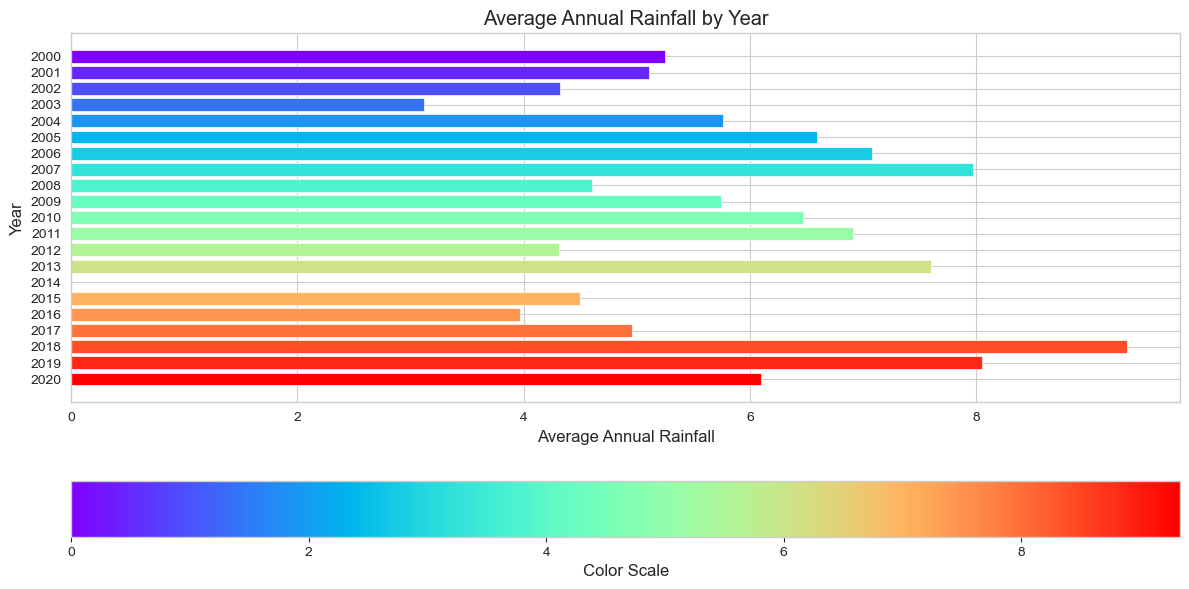

In [73]:
plt.figure(figsize=(12, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(df)))
bars = plt.barh(df['Year'], df['Avg Annual Rainfall'], color=colors)
plt.xlabel('Average Annual Rainfall')
plt.ylabel('Year')
plt.title('Average Annual Rainfall by Year')
plt.gca().invert_yaxis() 
plt.yticks(df['Year'])
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=min(df['Avg Annual Rainfall']), vmax=max(df['Avg Annual Rainfall'])))
sm.set_array([]) 
cbar = plt.colorbar(sm, orientation='horizontal', ax=plt.gca())
cbar.set_label('Color Scale')
plt.tight_layout()
plt.show()

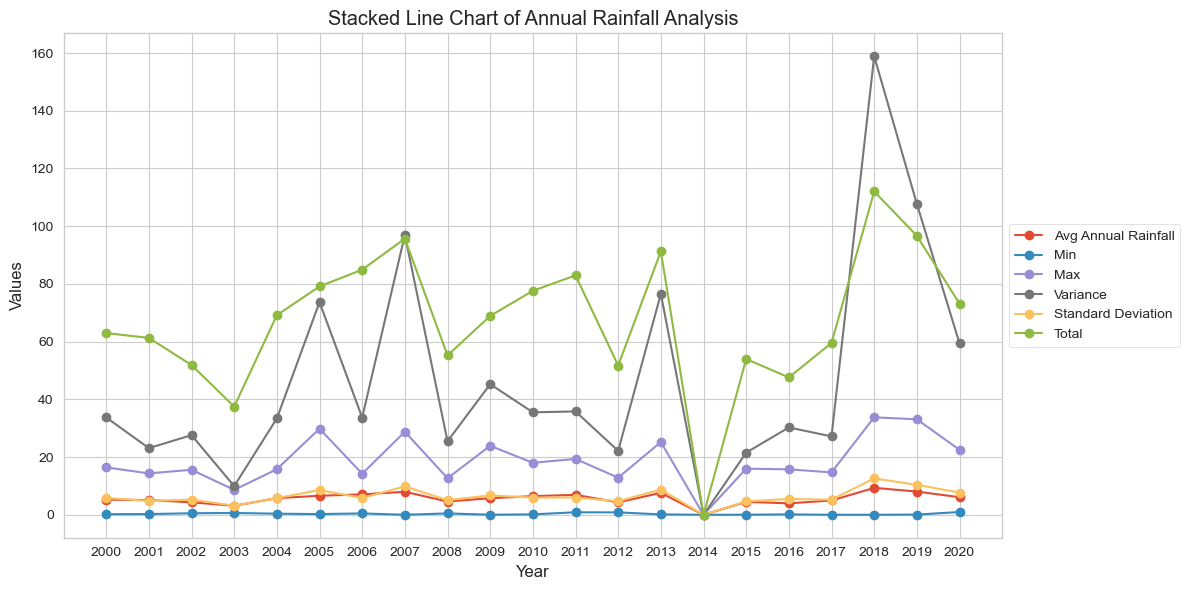

In [74]:
df = pd.read_csv('Annual_Analysis.csv')
plt.figure(figsize=(12, 6))
columns_to_plot = ['Avg Annual Rainfall', 'Min', 'Max', 'Variance', 'Standard Deviation', 'Total']
for column in columns_to_plot:
    plt.plot(df['Year'], df[column], marker='o', label=column)
plt.xticks(df['Year'])
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Stacked Line Chart of Annual Rainfall Analysis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

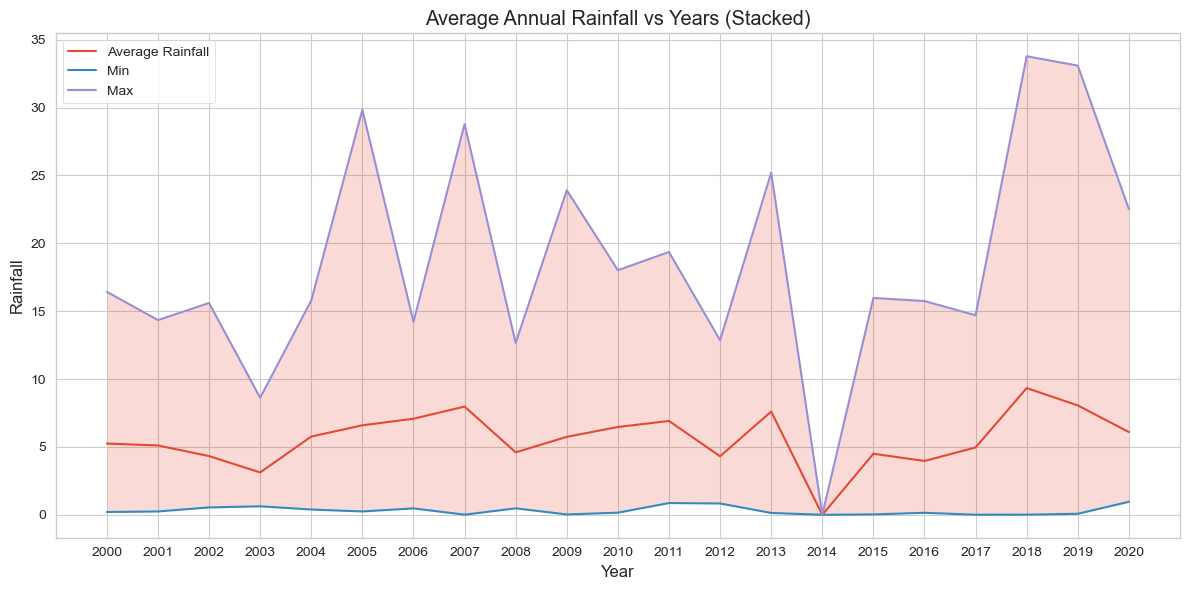

In [75]:
df = pd.read_csv('Annual_Analysis.csv')
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Avg Annual Rainfall'], label='Average Rainfall')
plt.plot(df['Year'], df['Min'], label='Min')
plt.plot(df['Year'], df['Max'], label='Max')
plt.fill_between(df['Year'], df['Min'], df['Max'], alpha=0.2)
plt.title('Average Annual Rainfall vs Years (Stacked)')
plt.xticks(df['Year'])
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

       Date  Year  Rainfall
0   January  2000  0.000000
1  February  2000  0.206897
2     March  2000  0.000000
3     April  2000  4.400000
4       May  2000  2.400000


/Users/basilshaji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/basilshaji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


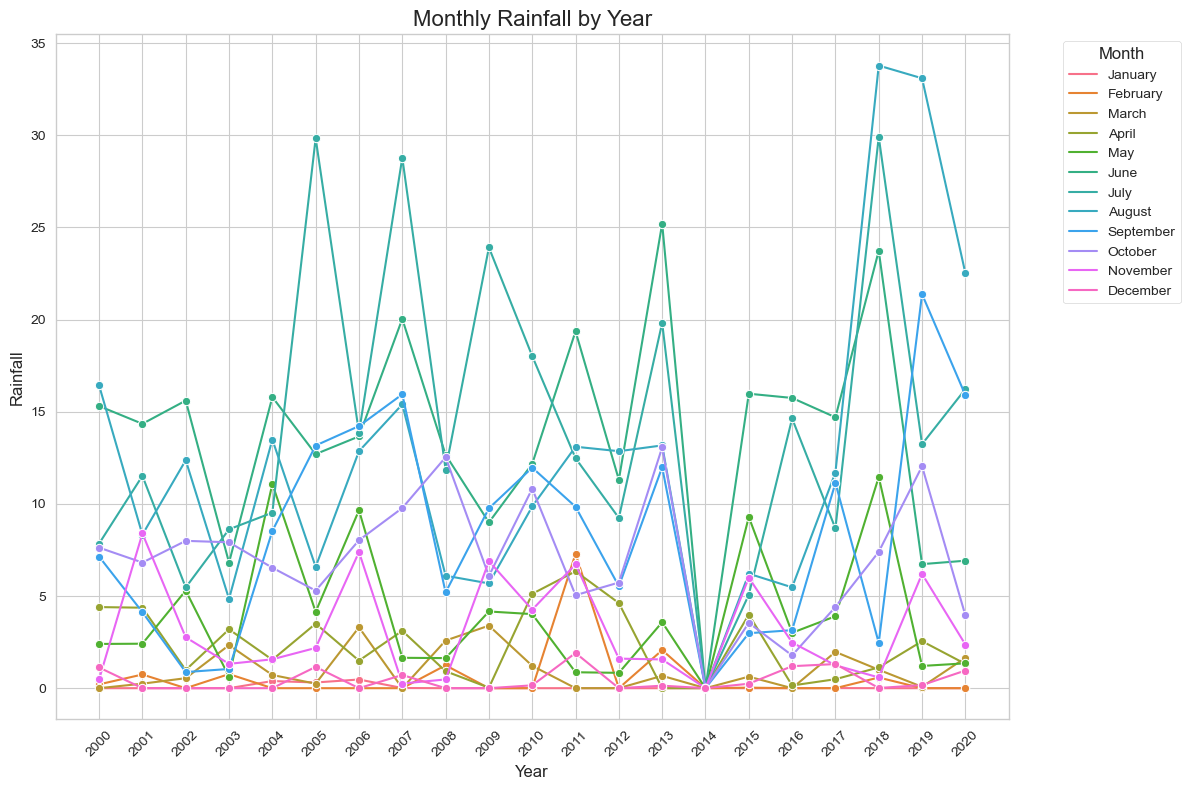

In [76]:
df = pd.read_csv('monthly_average.csv')
df_melted = df.melt(id_vars=['Date'], var_name='Year', value_name='Rainfall')
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted.replace([float('Inf'), float('-Inf')], pd.NA, inplace=True)
df_melted = df_melted.dropna()
print(df_melted.head())
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.lineplot(data=df_melted, x='Year', y='Rainfall', hue='Date', marker='o')
plt.title('Monthly Rainfall by Year', fontsize=16)
plt.xticks(sorted(df_melted['Year'].dropna().unique().astype(int)))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall', fontsize=12)
plt.legend(title='Month', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

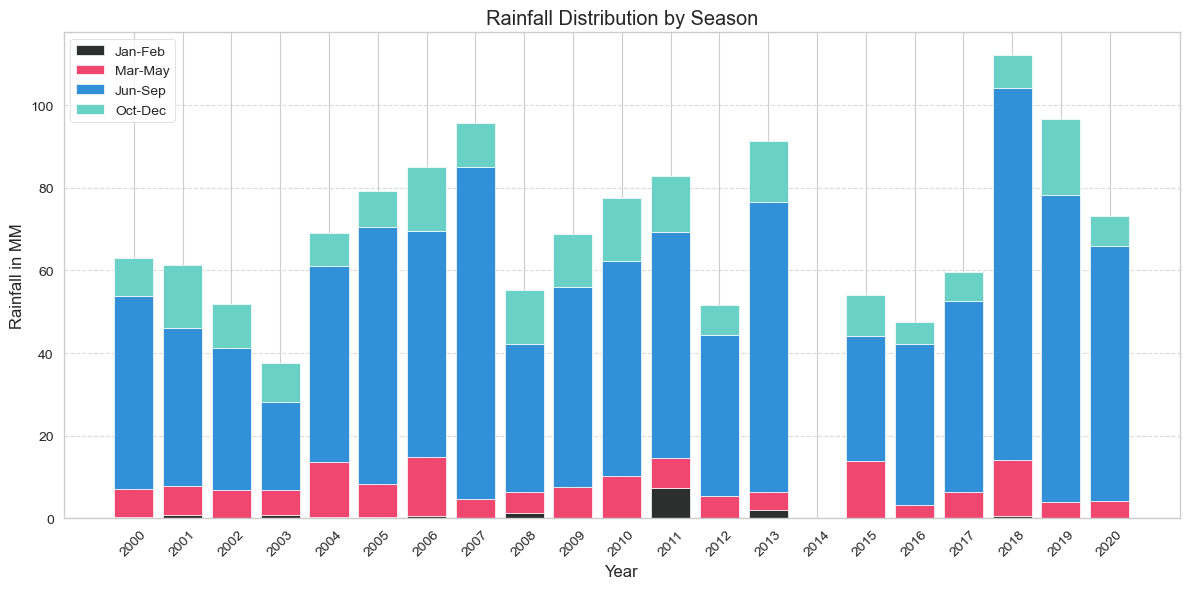



       Jan-Feb    Mar-May    Jun-Sep    Oct-Dec
2000  0.206897   6.800000  46.717634   9.228387
2001  0.742857   7.024731  38.318387  15.209462
2002  0.000000   6.825376  34.308925  10.753548
2003  0.764286   6.154624  21.317957   9.236129
2004  0.387097  13.340000  47.336237   8.102151




In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('monthly_average.csv')

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Group months into seasons
seasons = {
    'Jan-Feb': ['January', 'February'],
    'Mar-May': ['March', 'April', 'May'],
    'Jun-Sep': ['June', 'July', 'August', 'September'],
    'Oct-Dec': ['October', 'November', 'December']
}

# Create a new dataframe with seasonal data
seasonal_data = pd.DataFrame()

for season, months in seasons.items():
    seasonal_data[season] = df.loc[months].sum()

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Define custom colors
colors = ['#2D2E2E', '#EF476F', '#3190D8', '#69D1C5', '#DDF0FF']

# Create stacked bars with cumulative sums for each row
bottom = np.zeros(len(seasonal_data))
for col, color in zip(seasonal_data.columns, colors):
    plt.bar(seasonal_data.index, seasonal_data[col], bottom=bottom, label=col, color=color)
    bottom += seasonal_data[col]

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Rainfall in MM')
plt.title('Rainfall Distribution by Season')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

print("\n")
print(seasonal_data.head())
print("\n")


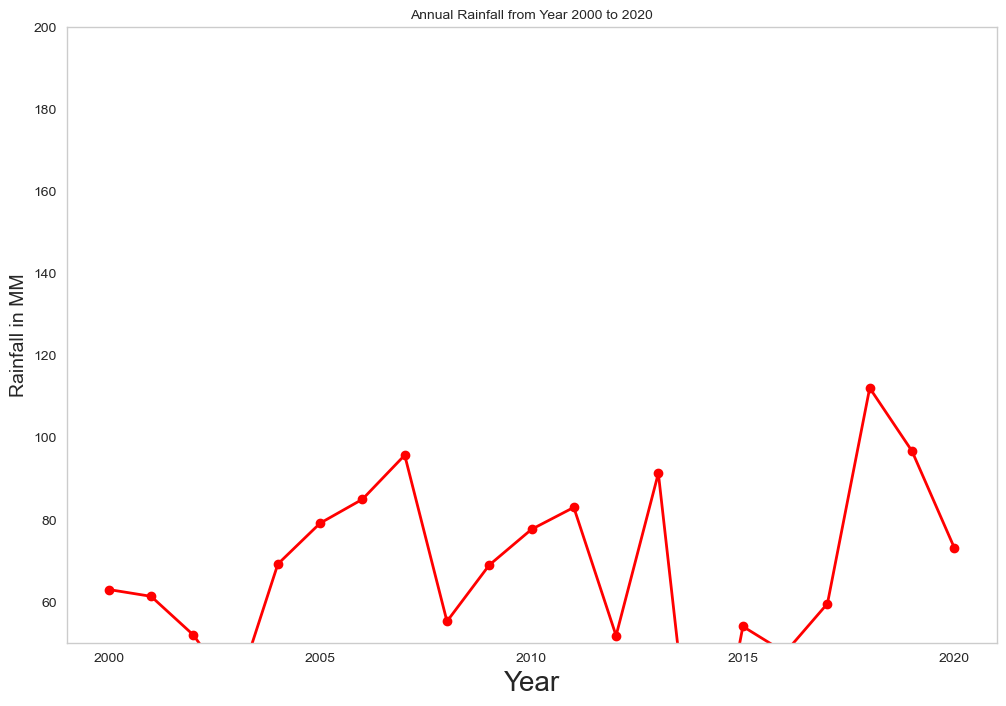

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('monthly_average.csv', index_col='Date')

# Convert the dataframe to have years as columns and sum up all months to get annual data
df_annual = df.sum()

# Plotting the data
df_annual.plot(ylim=(50,200), color='r', marker='o', linestyle='-', linewidth=2, figsize=(12,8))
plt.xlabel('Year', size=20)
plt.ylabel('Rainfall in MM', size=14)
plt.title('Annual Rainfall from Year 2000 to 2020', size=10)
plt.grid()
plt.show()

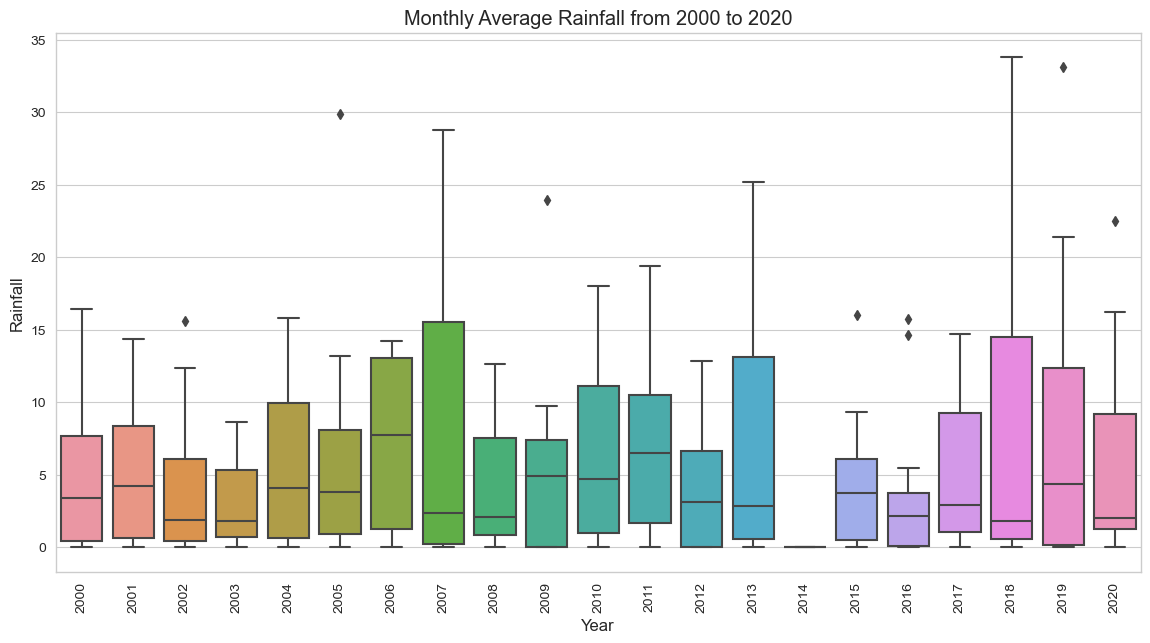

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('monthly_average.csv')

# Melt the dataframe to make it long-form
melted_df = df.melt(id_vars=['Date'], var_name='Year', value_name='Rainfall')

# Convert 'Year' to numeric
df['Year'] = pd.to_numeric(melted_df['Year'])

# Plot the data
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Rainfall', data=melted_df)
plt.xticks(rotation=90)
plt.title('Monthly Average Rainfall from 2000 to 2020')
plt.show()

       Date      2000      2001      2002      2003       2004      2005  \
0   January  0.000000  0.000000  0.000000  0.000000   0.387097  0.309677   
1  February  0.206897  0.742857  0.000000  0.764286   0.000000  0.000000   
2     March  0.000000  0.245161  0.541935  2.335484   0.716129  0.245161   
3     April  4.400000  4.366667  0.986667  3.193333   1.540000  3.500000   
4       May  2.400000  2.412903  5.296774  0.625806  11.083871  4.141935   

       2006      2007      2008  ...      2011      2012      2013  2014  \
0  0.470968  0.009677  0.000000  ...  0.000000  0.000000  0.000000   0.0   
1  0.000000  0.000000  1.241379  ...  7.292857  0.000000  2.064286   0.0   
2  3.303226  0.000000  2.583871  ...  0.000000  0.000000  0.670968   0.0   
3  1.493333  3.113333  0.920000  ...  6.340000  4.620000  0.000000   0.0   
4  9.651613  1.648387  1.632258  ...  0.864516  0.832258  3.580645   0.0   

       2015      2016      2017       2018      2019      2020  
0  0.000000  0.000000

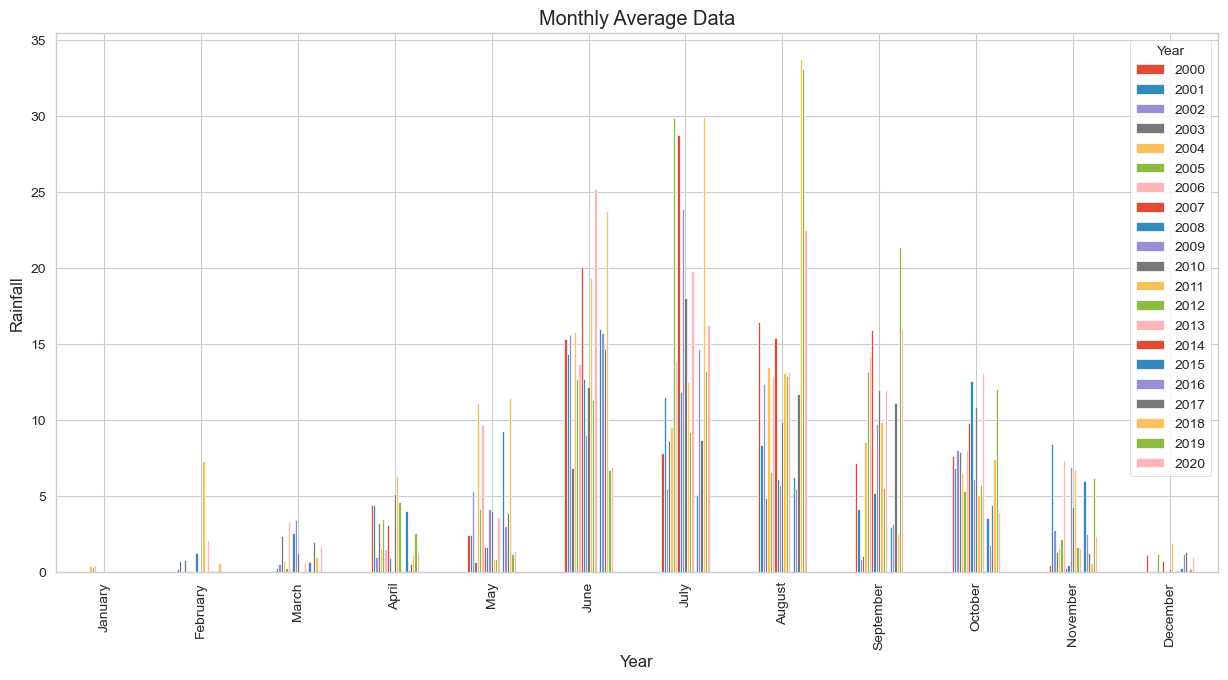

In [80]:
# This code will load the data from 'monthly_average.csv' and plot a bar plot for the data.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('monthly_average.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Plotting the bar plot
df.plot(kind='bar', x='Date', figsize=(15, 7))
plt.title('Monthly Average Data')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend(title='Year')
plt.show()

/var/folders/s4/fkcqhd2d63vdlyw8x3_sp3ch0000gn/T/ipykernel_21422/781882919.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = df_melted.groupby(['Year', 'Season'])['Value'].mean().unstack()


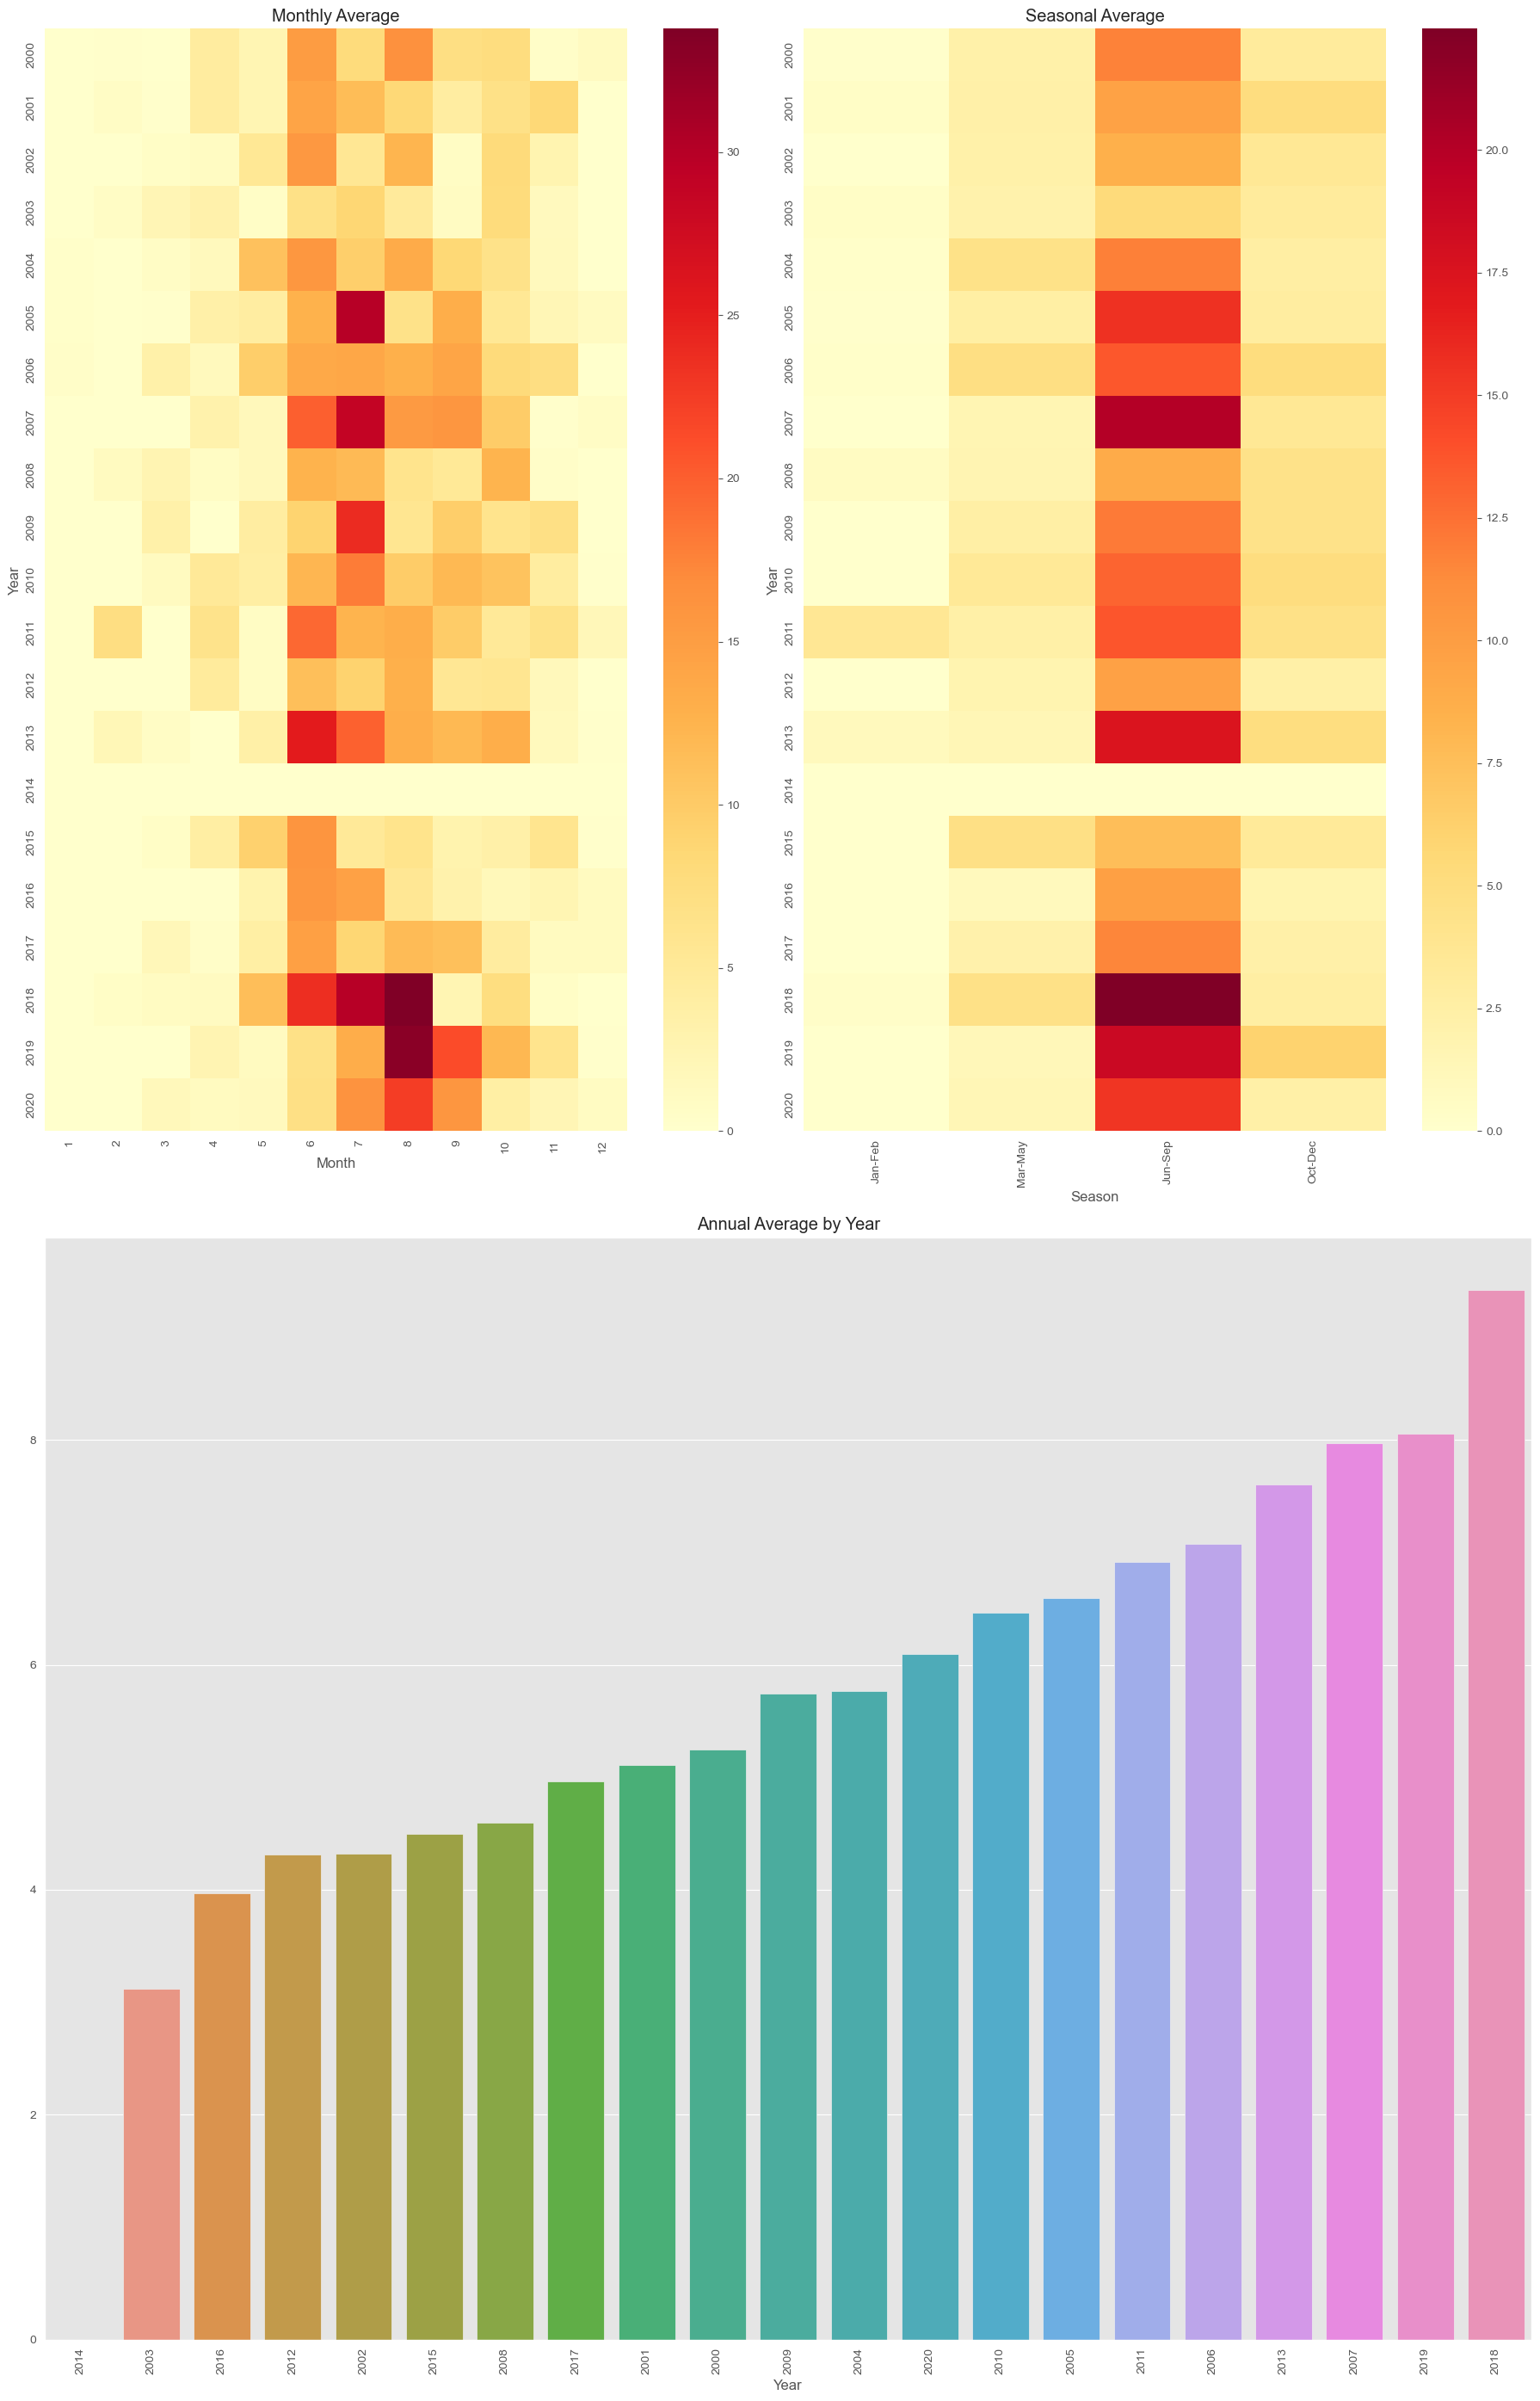

In [81]:
df = pd.read_csv('monthly_average.csv')
df['Month'] = df['Date'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})
df_melted = df.melt(id_vars=['Date', 'Month'], var_name='Year', value_name='Value')
df_melted['Season'] = pd.cut(df_melted['Month'], 
                             bins=[0, 2, 5, 9, 12], 
                             labels=['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'])
monthly_avg = df_melted.groupby(['Year', 'Month'])['Value'].mean().unstack()
seasonal_avg = df_melted.groupby(['Year', 'Season'])['Value'].mean().unstack()
annual_avg = df_melted.groupby('Year')['Value'].mean().sort_values()
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.heatmap(monthly_avg, ax=ax1, cmap='YlOrRd')
ax1.set_title('Monthly Average')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2 = plt.subplot2grid((2, 2), (0, 1))
sns.heatmap(seasonal_avg, ax=ax2, cmap='YlOrRd')
ax2.set_title('Seasonal Average')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
sns.barplot(x=annual_avg.index, y=annual_avg.values, ax=ax3)
ax3.set_title('Annual Average by Year')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

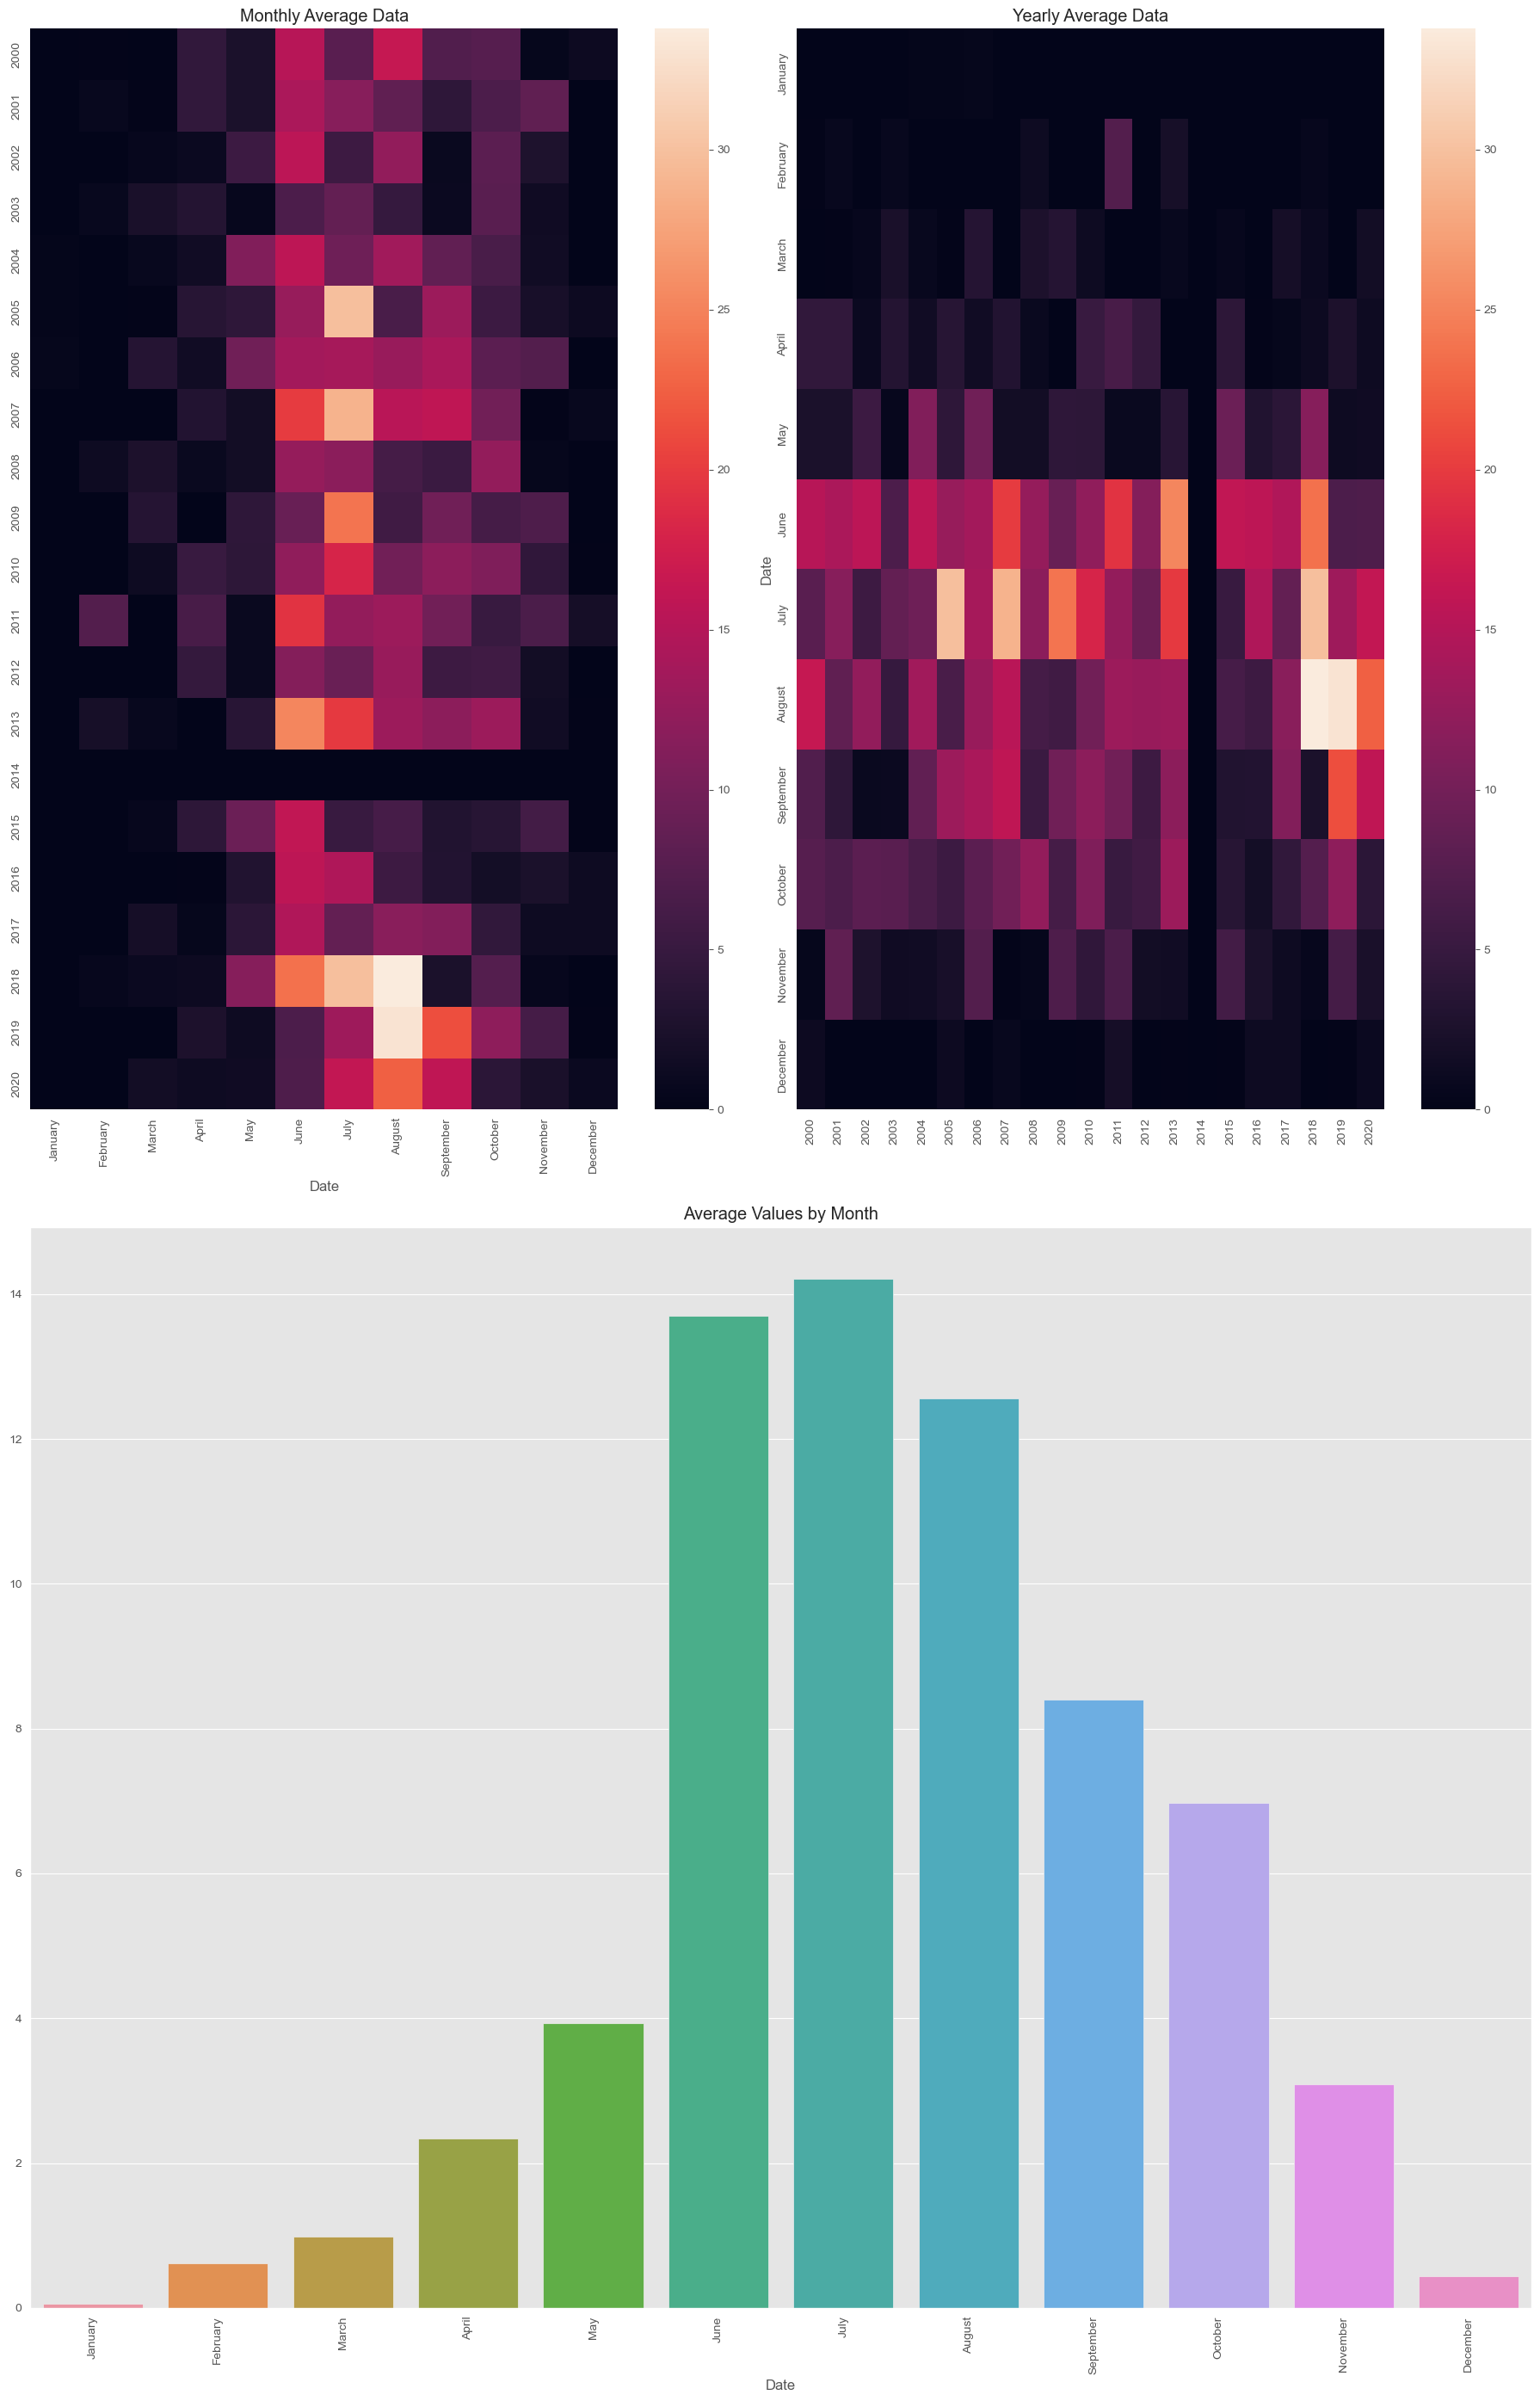

In [82]:
df = pd.read_csv('monthly_average.csv')
df.set_index('Date', inplace=True)
df_transposed = df.T
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.heatmap(df_transposed, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Monthly Average Data')
ax2 = plt.subplot2grid((2, 2), (0, 1))
sns.heatmap(df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Yearly Average Data')
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
monthly_avg = df.mean(axis=1)
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_title('Average Values by Month')
plt.tight_layout()
plt.show()

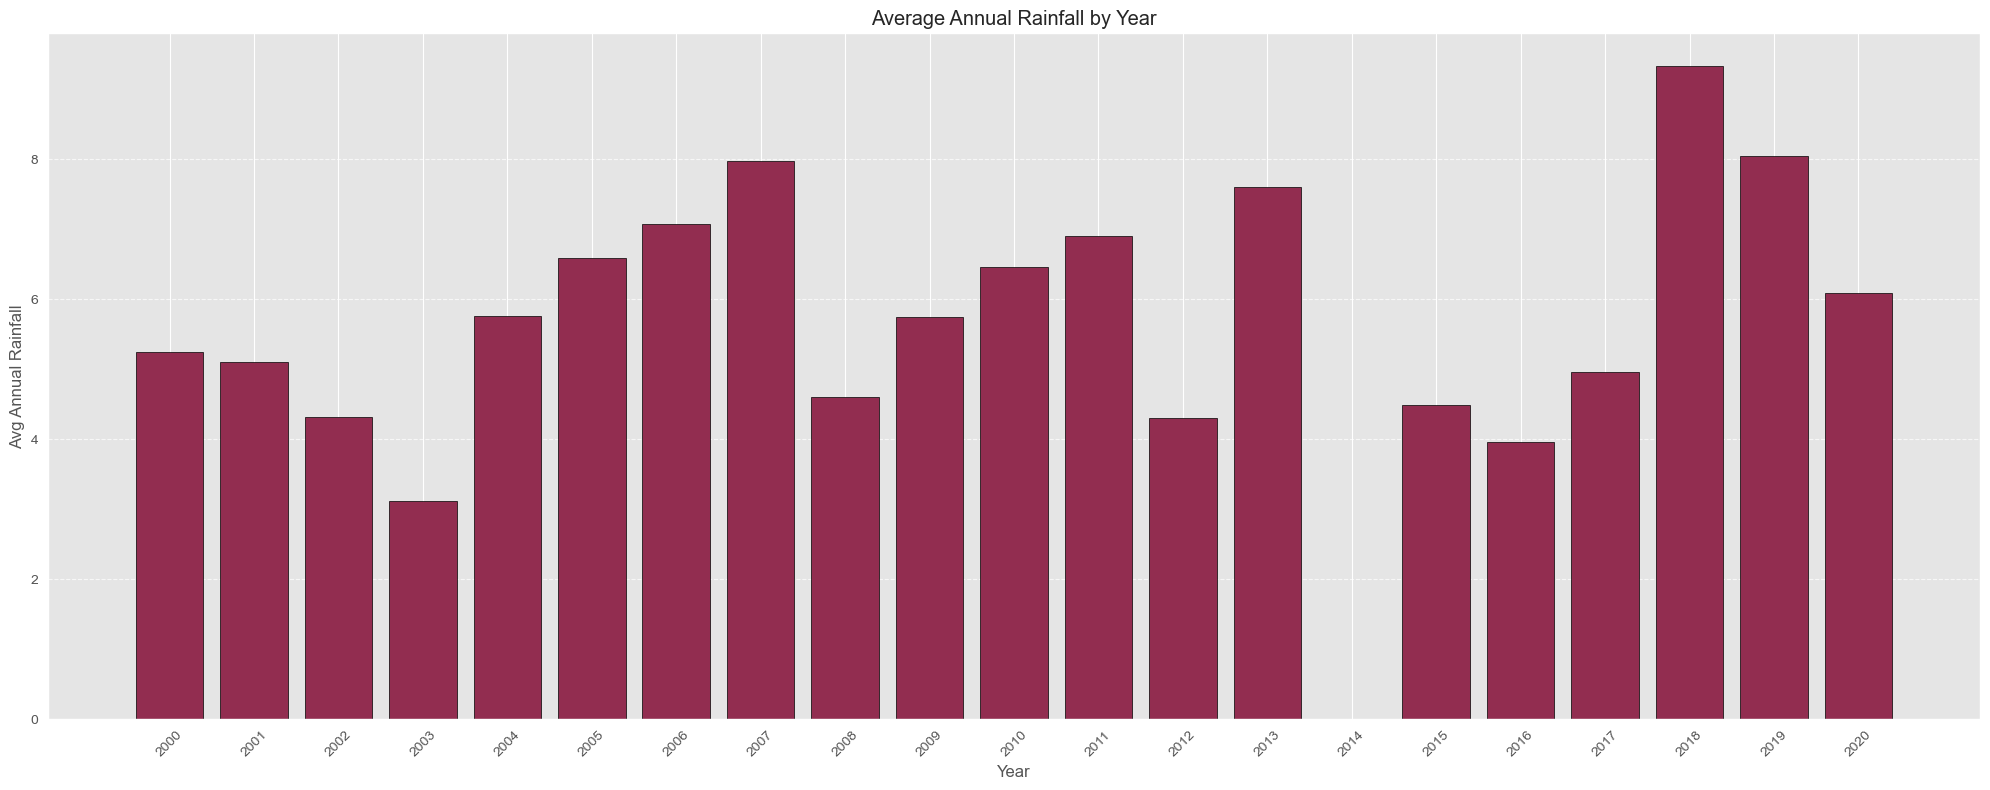

In [83]:
df = pd.read_csv('Annual_Analysis.csv')
df_sorted = df.sort_values('Year')
fig = plt.figure(figsize=(20, 8))
plt.bar(df_sorted['Year'], df_sorted['Avg Annual Rainfall'], color='#922D50', edgecolor='black')
plt.title('Average Annual Rainfall by Year')
plt.xlabel('Year')
plt.ylabel('Avg Annual Rainfall')
plt.xticks(df_sorted['Year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

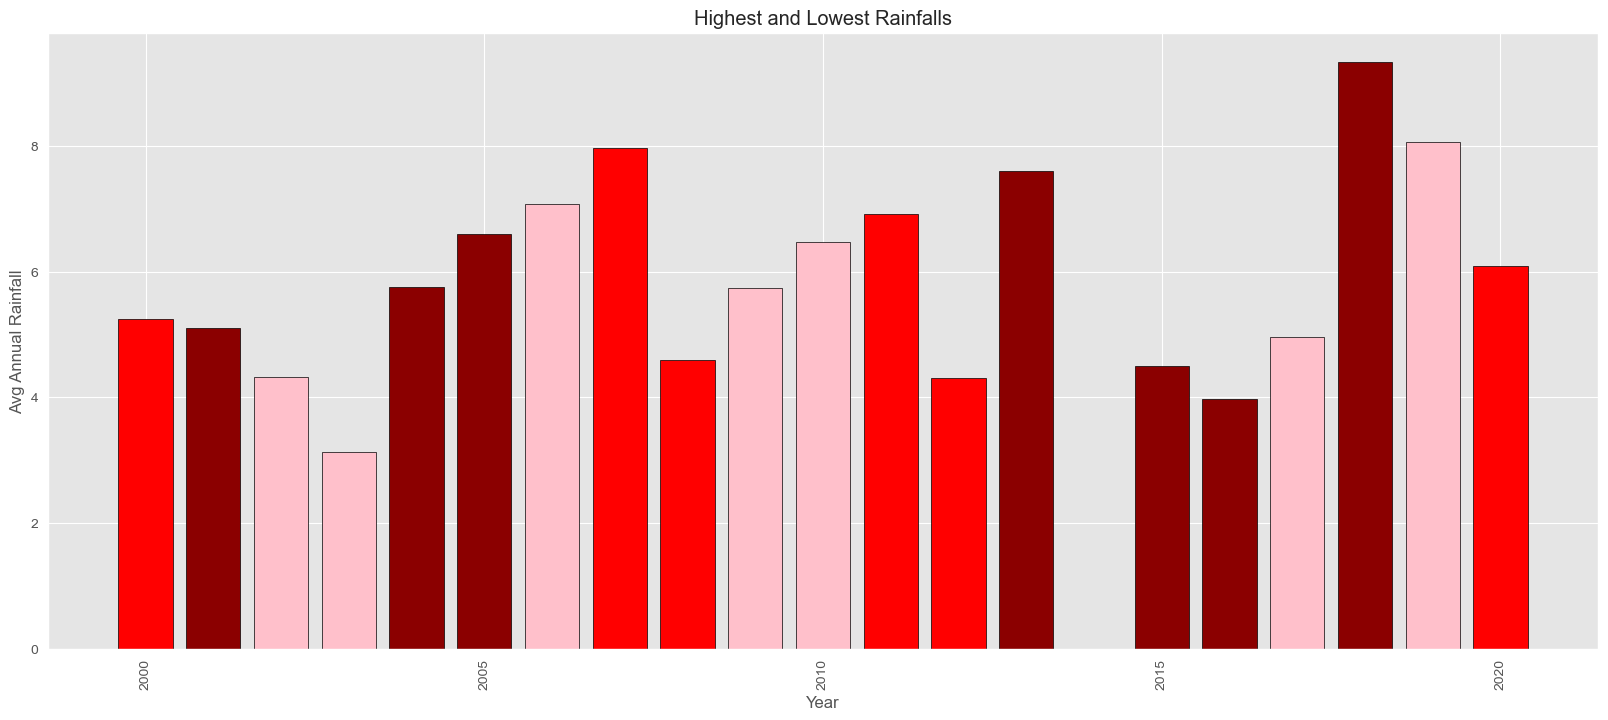

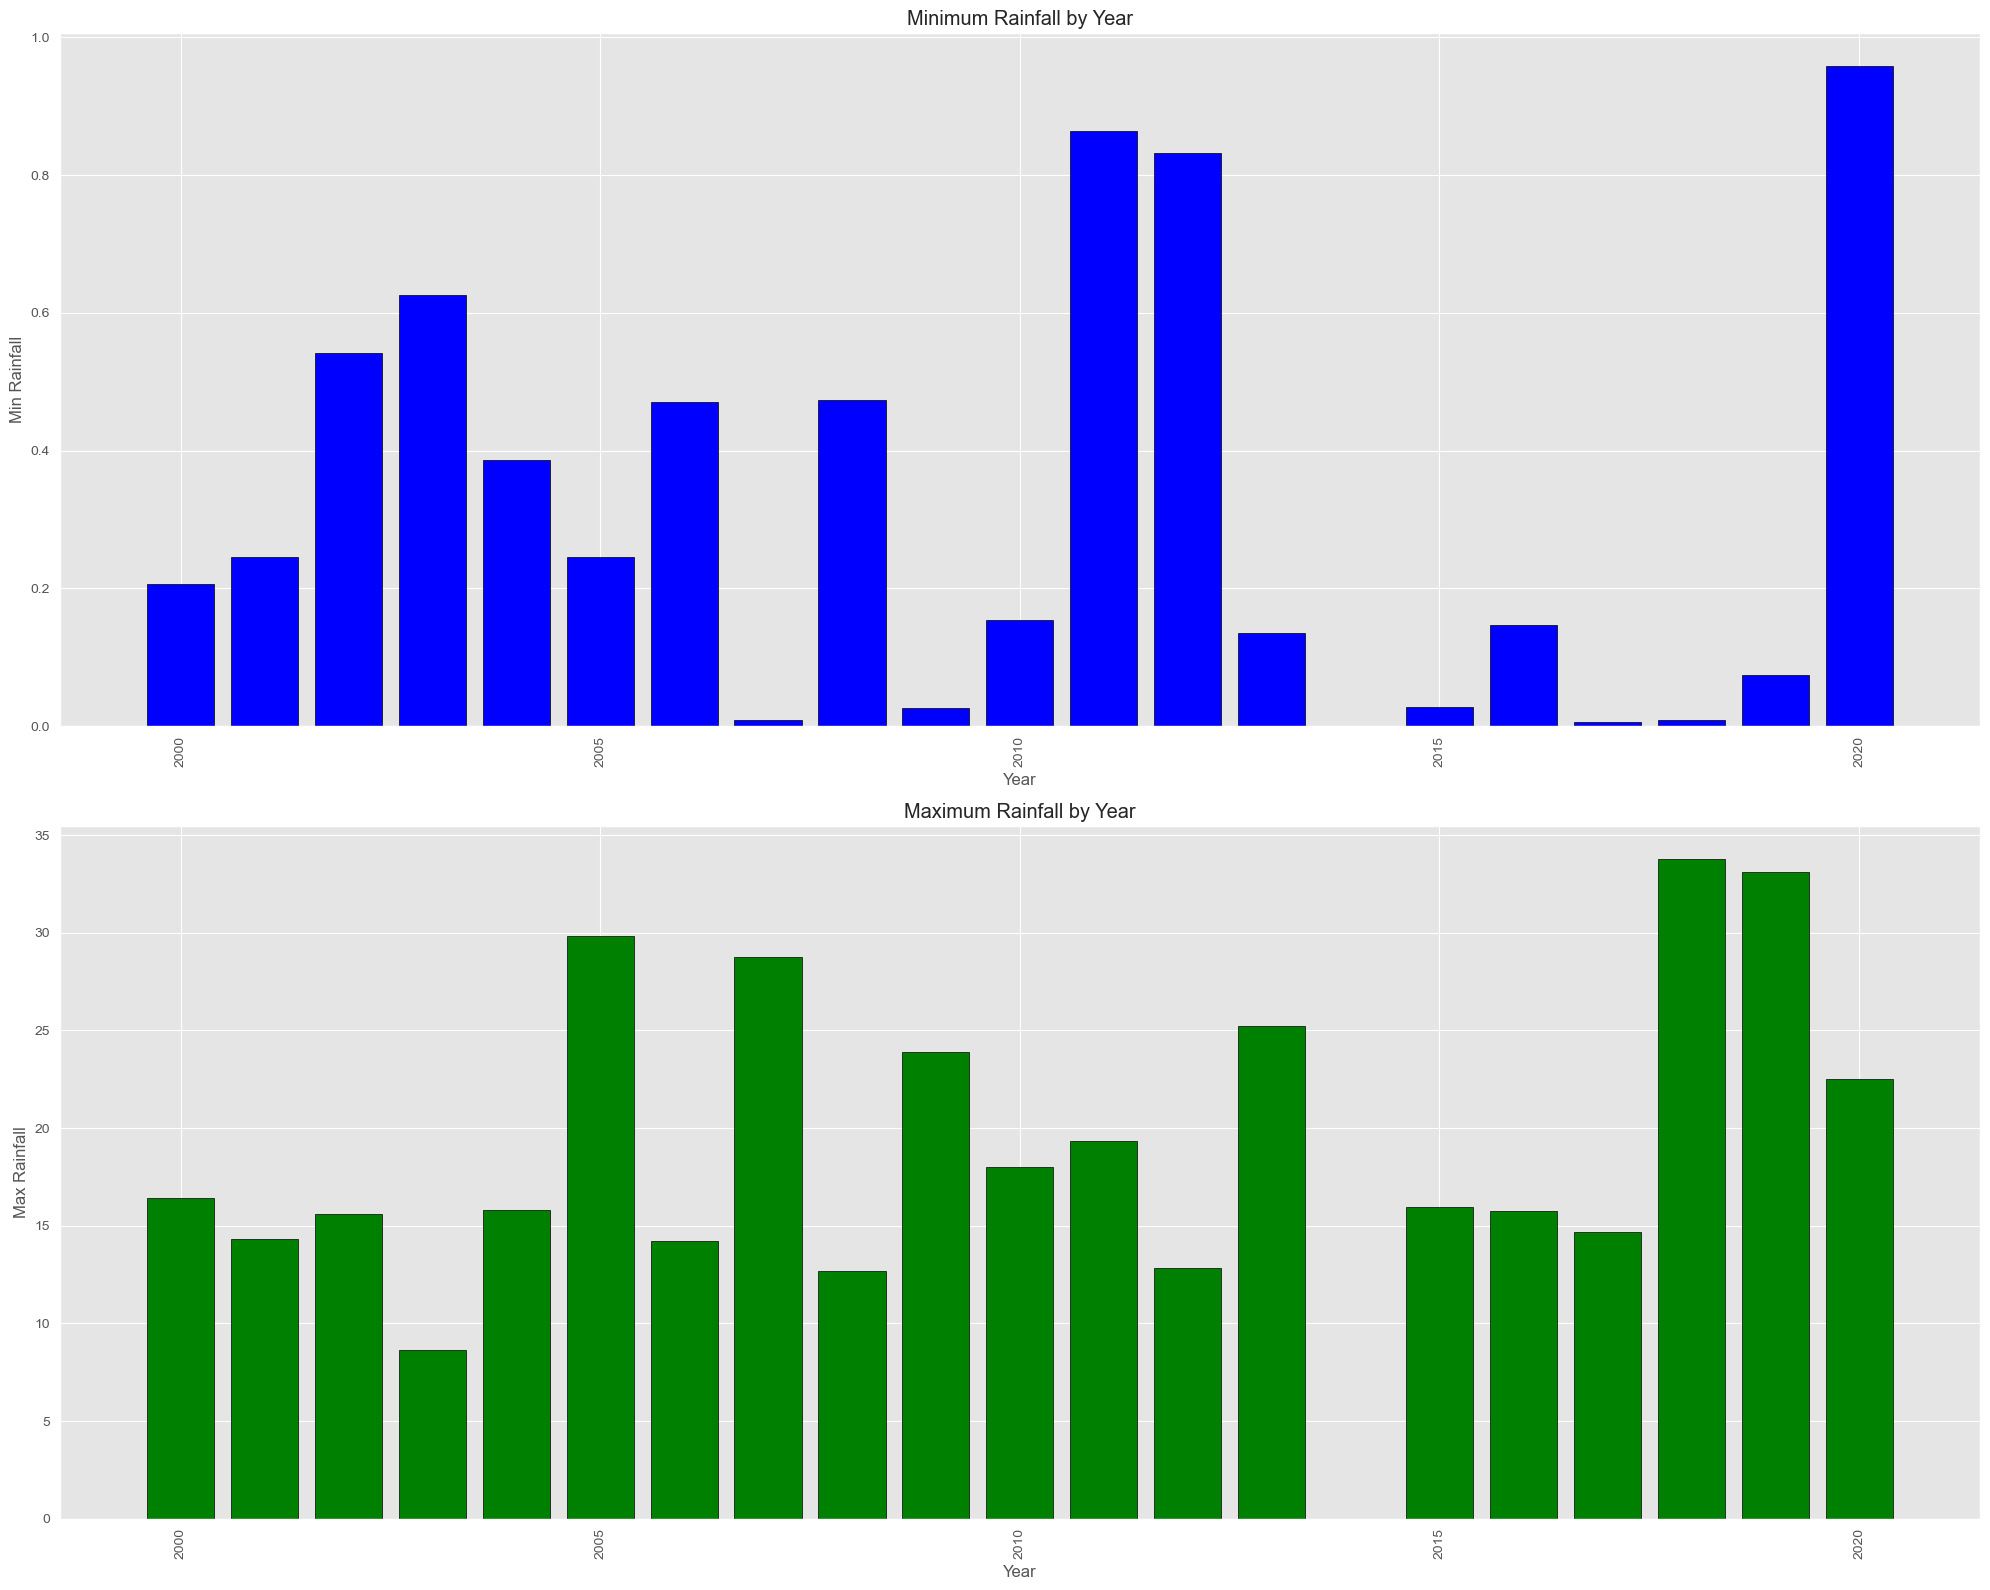

In [84]:
df = pd.read_csv('Annual_Analysis.csv')
x1 = df.sort_values('Avg Annual Rainfall')
fig = plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
plt.bar(x1['Year'], x1['Avg Annual Rainfall'], color=['red', 'pink', 'darkred'], edgecolor='black')
plt.title('Highest and Lowest Rainfalls')
plt.xlabel('Year')
plt.ylabel('Avg Annual Rainfall')
plt.show()
df_min_max = df[['Year', 'Min', 'Max']].sort_values(['Min', 'Max'])
fig, ax = plt.subplots(2, 1, figsize=(20, 16))
ax[0].bar(df_min_max['Year'], df_min_max['Min'], color='blue', edgecolor='black')
ax[0].set_title('Minimum Rainfall by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Min Rainfall')
ax[0].tick_params(axis='x', rotation=90)
ax[1].bar(df_min_max['Year'], df_min_max['Max'], color='green', edgecolor='black')
ax[1].set_title('Maximum Rainfall by Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Max Rainfall')
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

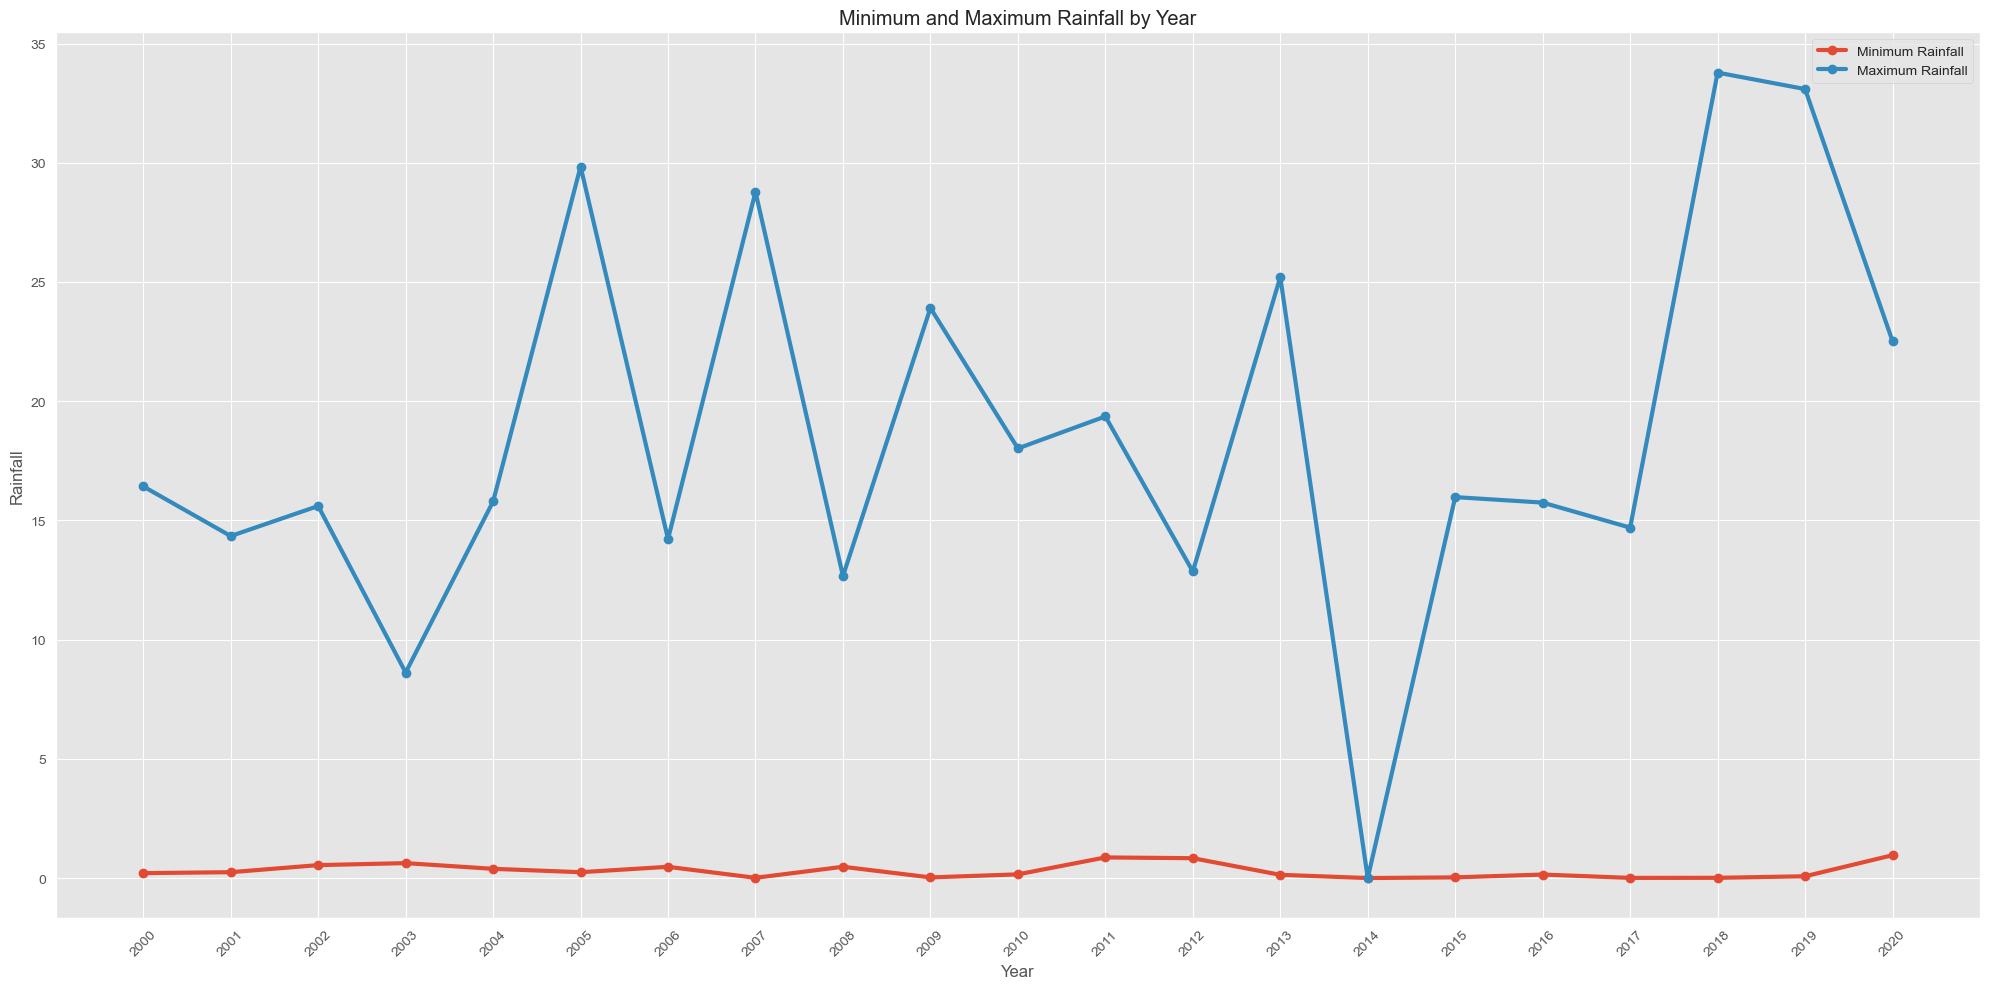

In [85]:
df = pd.read_csv('Annual_Analysis.csv')
plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['Min'], marker='o', linewidth=3, label='Minimum Rainfall')  # Adjust linewidth here
plt.plot(df['Year'], df['Max'], marker='o', linewidth=3, label='Maximum Rainfall')  # Adjust linewidth here
plt.title('Minimum and Maximum Rainfall by Year')
plt.xticks(df['Year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

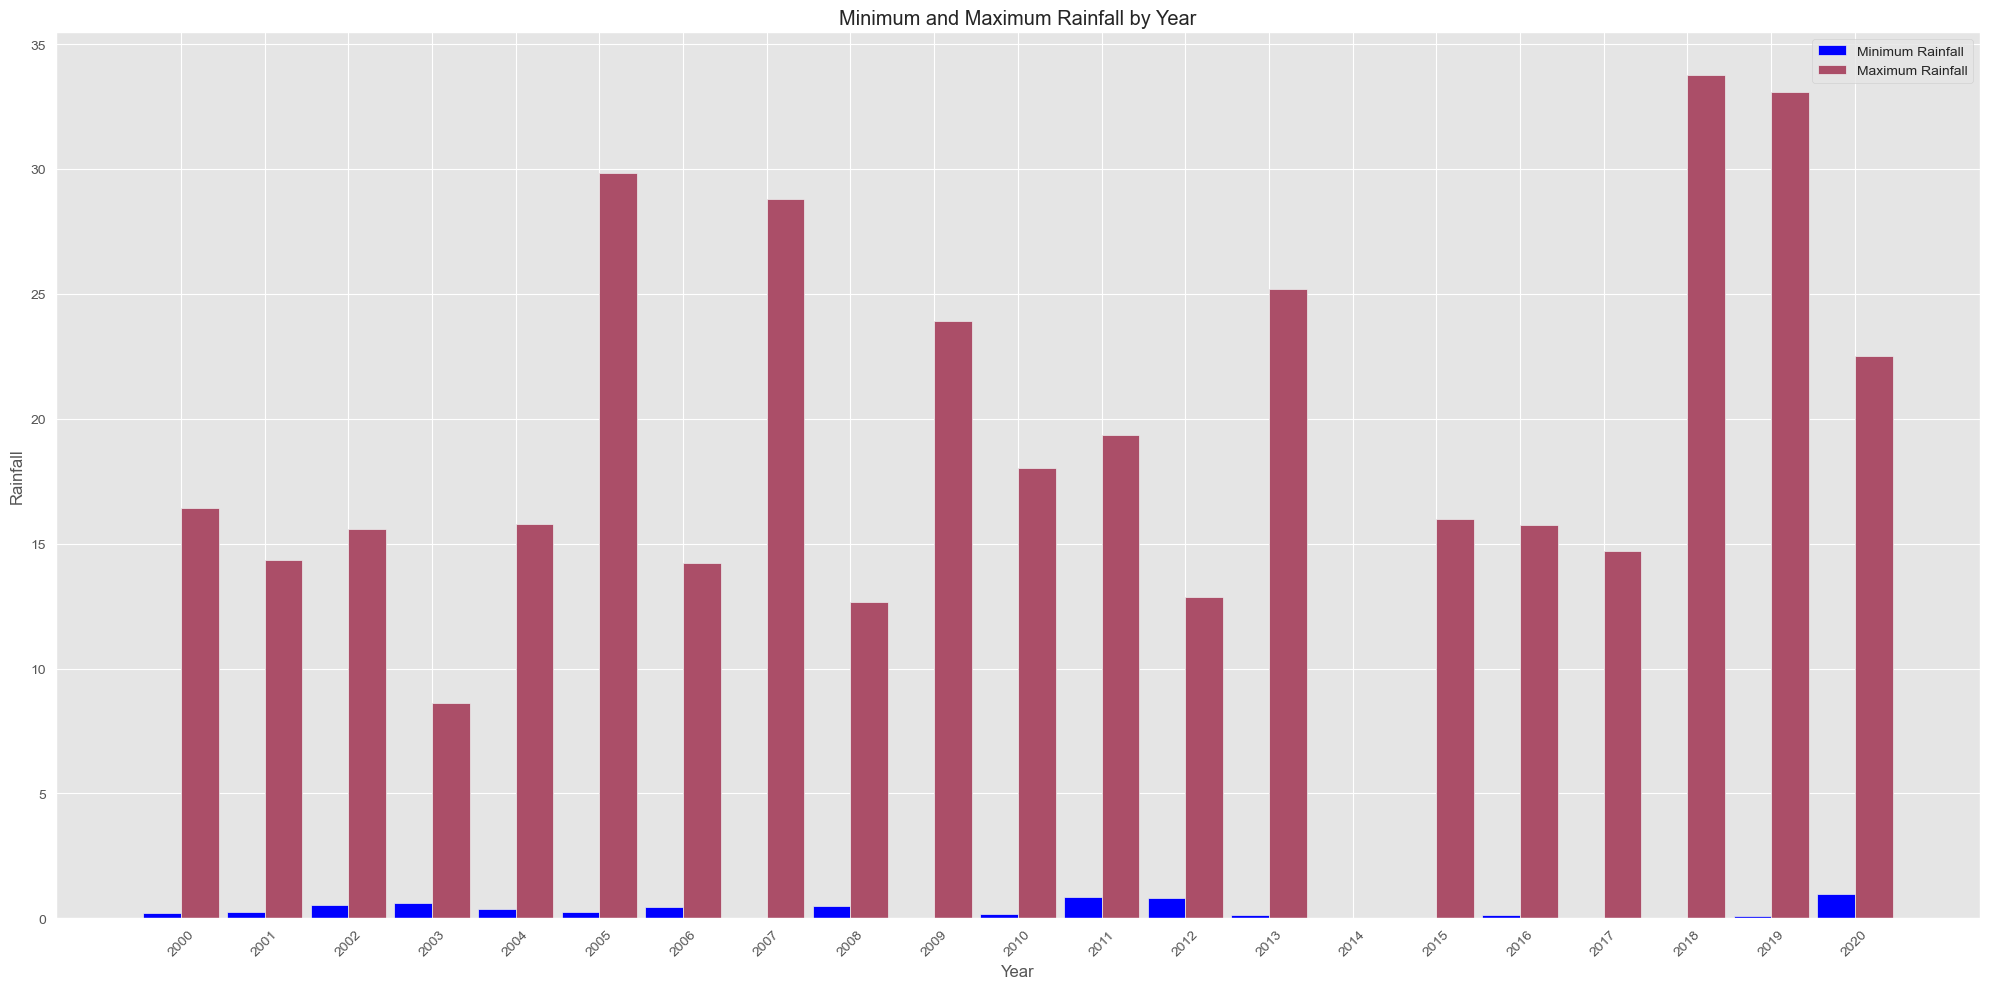

In [86]:
df = pd.read_csv('Annual_Analysis.csv')
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.45
x = range(len(df['Year']))
ax.bar([i - width/2 for i in x], df['Min'], width, label='Minimum Rainfall', color='blue')
ax.bar([i + width/2 for i in x], df['Max'], width, label='Maximum Rainfall', color='#AB4E68')
ax.set_ylabel('Rainfall')
ax.set_xlabel('Year')
ax.set_title('Minimum and Maximum Rainfall by Year')
ax.set_xticks(x)
ax.set_xticklabels(df['Year'], rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

Season  NE Monsoon  Non Monsoon  Pre Monsoon  SW Monsoon
2000      4.111475     0.448352     2.243478   11.686885
2001      7.591803     0.231111     2.319565    9.585246
2002      5.419672     0.000000     2.289130    8.582787
2003      4.672131     0.237778     2.039130    5.352459
2004      4.091803     0.131868     4.478261   11.828689


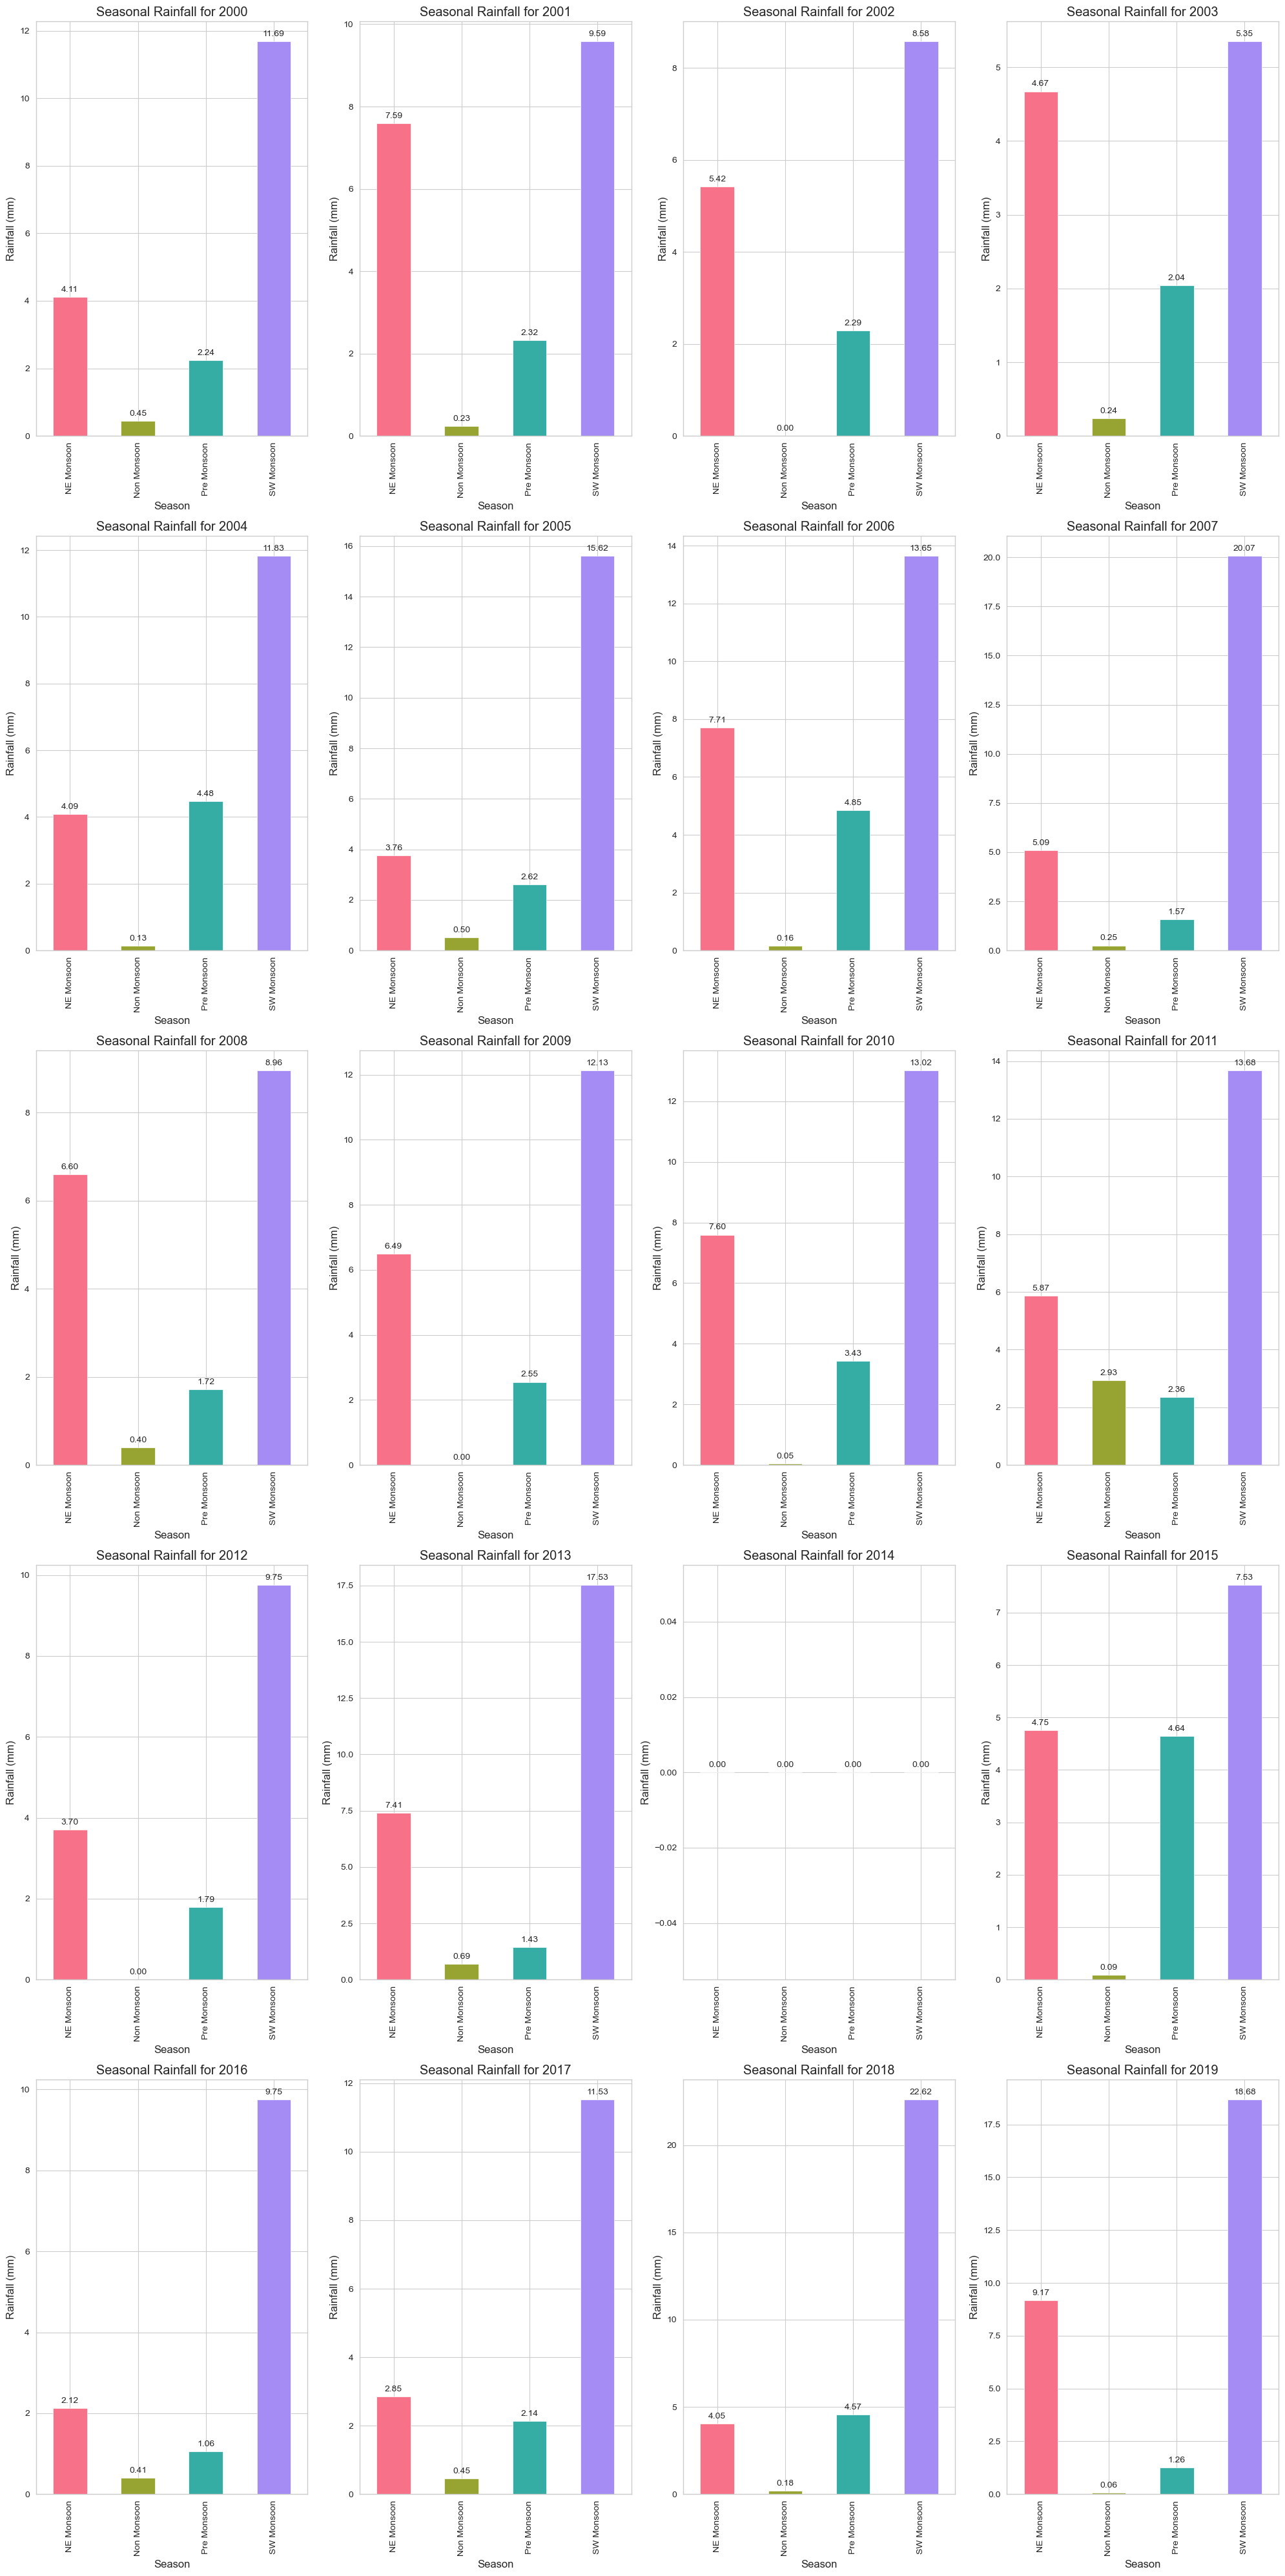

In [87]:
df = pd.read_csv('seasonal_average_by_year.csv')
df_t = df.set_index('Season').T
sns.set_style("whitegrid")
print(df_t.head())
palette = sns.color_palette("husl", len(df_t.columns))
fig = plt.figure(figsize=(20, 40))
for i, year in enumerate(df_t.index):
    if i >= 20:
        break
    ax = plt.subplot(5, 4, i+1)
    bars = df_t.loc[year].plot(kind='bar', ax=ax, color=palette)
    plt.title('Seasonal Rainfall for ' + str(year))
    plt.ylabel('Rainfall (mm)')
    plt.xlabel('Season')
    for bar in bars.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')
plt.tight_layout()
plt.show()

## Model Training

### Monthly Data

In [80]:
import csv
from datetime import datetime
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# Code to Restructure the Data:
with open('monthly_average.csv', 'r') as input_file:
    reader = csv.reader(input_file)
    next(reader)
    restructured_data = []
    for row in reader:
        for i, value in enumerate(row[1:]):
            date = f"{i+1:02d}-{row[0]}"
            avg_rainfall = float(value) if value else 0.0
            restructured_data.append([date, avg_rainfall])
with open('restructured_monthly_average.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(['Date', 'Avg Rainfall'])
    writer.writerows(restructured_data)

In [36]:
df = pd.read_csv('restructured_monthly_average.csv')
X = df['Date'].str.split('-', expand=True)[0].astype(int)
y = df['Avg Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"R-squared score: {score:.2f}")
future_years = list(range(2021, 2026))
future_dates = [f"{month:02d}-{year}" for year in future_years for month in range(1, 13)]
future_X = pd.Series(future_dates).str.split('-', expand=True)[0].astype(int).values.reshape(-1, 1)
future_y = model.predict(future_X)
print("Predicted average rainfall for the future years:")
for date, rainfall in zip(future_dates, future_y):
    print(f"{date}: {rainfall:.2f}")

R-squared score: -0.01
Predicted average rainfall for the future years:
01-2021: 5.04
02-2021: 5.10
03-2021: 5.17
04-2021: 5.23
05-2021: 5.30
06-2021: 5.36
07-2021: 5.43
08-2021: 5.49
09-2021: 5.56
10-2021: 5.62
11-2021: 5.68
12-2021: 5.75
01-2022: 5.04
02-2022: 5.10
03-2022: 5.17
04-2022: 5.23
05-2022: 5.30
06-2022: 5.36
07-2022: 5.43
08-2022: 5.49
09-2022: 5.56
10-2022: 5.62
11-2022: 5.68
12-2022: 5.75
01-2023: 5.04
02-2023: 5.10
03-2023: 5.17
04-2023: 5.23
05-2023: 5.30
06-2023: 5.36
07-2023: 5.43
08-2023: 5.49
09-2023: 5.56
10-2023: 5.62
11-2023: 5.68
12-2023: 5.75
01-2024: 5.04
02-2024: 5.10
03-2024: 5.17
04-2024: 5.23
05-2024: 5.30
06-2024: 5.36
07-2024: 5.43
08-2024: 5.49
09-2024: 5.56
10-2024: 5.62
11-2024: 5.68
12-2024: 5.75
01-2025: 5.04
02-2025: 5.10
03-2025: 5.17
04-2025: 5.23
05-2025: 5.30
06-2025: 5.36
07-2025: 5.43
08-2025: 5.49
09-2025: 5.56
10-2025: 5.62
11-2025: 5.68
12-2025: 5.75


### Yearly Data

#### Prediction and Comparison:

##### For 19 Years.

In [137]:
import pandas as pd
data = pd.read_csv('reduced_annual_data.csv')
start_year = 2000
end_year = 2019
filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
print(filtered_data)
filtered_data.to_csv('/Users/basilshaji/Desktop/Works/Projects/Rainfall - LR/Test_1/yearly_analysis/19_years.csv', index=False)

    Year  Avg Annual Rainfall
0   2000             5.246077
1   2001             5.107953
2   2002             4.323987
3   2003             3.122750
4   2004             5.763790
5   2005             6.593145
6   2006             7.077849
7   2007             7.972706
8   2008             4.600088
9   2009             5.742670
10  2010             6.467527
11  2011             6.912747
12  2012             4.310116
13  2013             7.605232
14  2014             0.000000
15  2015             4.496870
16  2016             3.966443
17  2017             4.960394
18  2018             9.335571
19  2019             8.056066


In [138]:
data = pd.read_csv('/Users/basilshaji/Desktop/Works/Projects/Rainfall - LR/Test_1/yearly_analysis/19_years.csv')
X = data[['Year']]
y = data['Avg Annual Rainfall']
model = LinearRegression()
model.fit(X, y)
warnings.filterwarnings("ignore")
# Predicting future years
future_years = np.array(range(2020, 2021)).reshape(-1, 1)
predictions = model.predict(future_years)
for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Predicted Avg Annual Rainfall for {year}: {prediction:.2f}")

Predicted Avg Annual Rainfall for 2020: 6.10


In [139]:
def compare_predicted_with_dataset(original_data_path):
    original_data = pd.read_csv(original_data_path)
    comparison = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Avg Annual Rainfall': predictions})
    actual_values = original_data[original_data['Year'].isin(comparison['Year'])][['Year', 'Avg Annual Rainfall']]
    comparison = comparison.merge(actual_values, on='Year', how='left', suffixes=('', '_Actual'))
    print(comparison)

# Specify the path to the original dataset for comparison
original_data_path = 'reduced_annual_data.csv'
compare_predicted_with_dataset(original_data_path)

   Year  Predicted Avg Annual Rainfall  Avg Annual Rainfall
0  2020                       6.100525             6.095708


In [140]:
def compare_predicted_with_dataset(original_data_path):
    original_data = pd.read_csv(original_data_path)
    comparison = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Avg Annual Rainfall': predictions})
    actual_values = original_data[original_data['Year'].isin(comparison['Year'])][['Year', 'Avg Annual Rainfall']]
    comparison = comparison.merge(actual_values, on='Year', how='left', suffixes=('', '_Actual'))
    
    # Check the columns and content of the DataFrame
    # print("Columns in comparison DataFrame:", comparison.columns)
    print(comparison.head())
    # Calculate mean squared error and mean absolute error if the column exists
    if 'Avg Annual Rainfall' in comparison.columns:
        mse = mean_squared_error(comparison['Avg Annual Rainfall'], comparison['Predicted Avg Annual Rainfall'])
        mae = mean_absolute_error(comparison['Avg Annual Rainfall'], comparison['Predicted Avg Annual Rainfall'])
        final_mse = round(mse,2)
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
    else:
        print("Column 'Avg Annual Rainfall' not found in the DataFrame.")
# Specify the path to the original dataset for comparison
original_data_path = 'reduced_annual_data.csv'
compare_predicted_with_dataset(original_data_path)

   Year  Predicted Avg Annual Rainfall  Avg Annual Rainfall
0  2020                       6.100525             6.095708
Mean Squared Error: 2.3200240179118586e-05
Mean Absolute Error: 0.004816662763690083


##### For 15 Years.

In [57]:
import pandas as pd
data = pd.read_csv('reduced_annual_data.csv')
start_year = 2000
end_year = 2015
filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
print(filtered_data)
filtered_data.to_csv('/Users/basilshaji/Desktop/Works/Projects/Rainfall - LR/Test_1/yearly_analysis/15_years.csv', index=False)

    Year  Avg Annual Rainfall
0   2000             5.246077
1   2001             5.107953
2   2002             4.323987
3   2003             3.122750
4   2004             5.763790
5   2005             6.593145
6   2006             7.077849
7   2007             7.972706
8   2008             4.600088
9   2009             5.742670
10  2010             6.467527
11  2011             6.912747
12  2012             4.310116
13  2013             7.605232
14  2014             0.000000
15  2015             4.496870


In [142]:
data = pd.read_csv('/Users/basilshaji/Desktop/Works/Projects/Rainfall - LR/Test_1/yearly_analysis/15_years.csv')
X = data[['Year']]
y = data['Avg Annual Rainfall']
model = LinearRegression()
model.fit(X, y)
warnings.filterwarnings("ignore")
# Predicting future years
future_years = np.array(range(2016, 2021)).reshape(-1, 1)
predictions = model.predict(future_years)
for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Predicted Avg Annual Rainfall for {year}: {prediction:.2f}")

Predicted Avg Annual Rainfall for 2016: 4.95
Predicted Avg Annual Rainfall for 2017: 4.90
Predicted Avg Annual Rainfall for 2018: 4.86
Predicted Avg Annual Rainfall for 2019: 4.81
Predicted Avg Annual Rainfall for 2020: 4.77


In [143]:
def compare_predicted_with_dataset(original_data_path):
    original_data = pd.read_csv(original_data_path)
    comparison = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Avg Annual Rainfall': predictions})
    actual_values = original_data[original_data['Year'].isin(comparison['Year'])][['Year', 'Avg Annual Rainfall']]
    comparison = comparison.merge(actual_values, on='Year', how='left', suffixes=('', '_Actual'))
    print(comparison)

# Specify the path to the original dataset for comparison
original_data_path = 'reduced_annual_data.csv'
compare_predicted_with_dataset(original_data_path)

   Year  Predicted Avg Annual Rainfall  Avg Annual Rainfall
0  2016                       4.948656             3.966443
1  2017                       4.903325             4.960394
2  2018                       4.857994             9.335571
3  2019                       4.812663             8.056066
4  2020                       4.767332             6.095708


In [144]:
def compare_predicted_with_dataset(original_data_path):
    original_data = pd.read_csv(original_data_path)
    comparison = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Avg Annual Rainfall': predictions})
    actual_values = original_data[original_data['Year'].isin(comparison['Year'])][['Year', 'Avg Annual Rainfall']]
    comparison = comparison.merge(actual_values, on='Year', how='left', suffixes=('', '_Actual'))
    
    # Check the columns and content of the DataFrame
    # print("Columns in comparison DataFrame:", comparison.columns)
    print(comparison.head())
    # Calculate mean squared error and mean absolute error if the column exists
    if 'Avg Annual Rainfall' in comparison.columns:
        mse = mean_squared_error(comparison['Avg Annual Rainfall'], comparison['Predicted Avg Annual Rainfall'])
        mae = mean_absolute_error(comparison['Avg Annual Rainfall'], comparison['Predicted Avg Annual Rainfall'])
        final_mse = round(mse,2)
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
    else:
        print("Column 'Avg Annual Rainfall' not found in the DataFrame.")
# Specify the path to the original dataset for comparison
original_data_path = 'reduced_annual_data.csv'
compare_predicted_with_dataset(original_data_path)

   Year  Predicted Avg Annual Rainfall  Avg Annual Rainfall
0  2016                       4.948656             3.966443
1  2017                       4.903325             4.960394
2  2018                       4.857994             9.335571
3  2019                       4.812663             8.056066
4  2020                       4.767332             6.095708
Mean Squared Error: 6.660187426236488
Mean Absolute Error: 2.0177275348478347


##### For 10 Years.

In [146]:
import pandas as pd
data = pd.read_csv('reduced_annual_data.csv')
start_year = 2000
end_year = 2010
filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
print(filtered_data)
filtered_data.to_csv('/Users/basilshaji/Desktop/Works/Projects/Rainfall - LR/Test_1/yearly_analysis/10_years.csv', index=False)

    Year  Avg Annual Rainfall
0   2000             5.246077
1   2001             5.107953
2   2002             4.323987
3   2003             3.122750
4   2004             5.763790
5   2005             6.593145
6   2006             7.077849
7   2007             7.972706
8   2008             4.600088
9   2009             5.742670
10  2010             6.467527


In [147]:
data = pd.read_csv('/Users/basilshaji/Desktop/Works/Projects/Rainfall - LR/Test_1/yearly_analysis/10_years.csv')
X = data[['Year']]
y = data['Avg Annual Rainfall']
model = LinearRegression()
model.fit(X, y)
warnings.filterwarnings("ignore")
# Predicting future years
future_years = np.array(range(2011, 2021)).reshape(-1, 1)
predictions = model.predict(future_years)
for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Predicted Avg Annual Rainfall for {year}: {prediction:.2f}")

Predicted Avg Annual Rainfall for 2011: 6.76
Predicted Avg Annual Rainfall for 2012: 6.94
Predicted Avg Annual Rainfall for 2013: 7.13
Predicted Avg Annual Rainfall for 2014: 7.31
Predicted Avg Annual Rainfall for 2015: 7.50
Predicted Avg Annual Rainfall for 2016: 7.69
Predicted Avg Annual Rainfall for 2017: 7.87
Predicted Avg Annual Rainfall for 2018: 8.06
Predicted Avg Annual Rainfall for 2019: 8.25
Predicted Avg Annual Rainfall for 2020: 8.43


In [148]:
def compare_predicted_with_dataset(original_data_path):
    original_data = pd.read_csv(original_data_path)
    comparison = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Avg Annual Rainfall': predictions})
    actual_values = original_data[original_data['Year'].isin(comparison['Year'])][['Year', 'Avg Annual Rainfall']]
    comparison = comparison.merge(actual_values, on='Year', how='left', suffixes=('', '_Actual'))
    print(comparison)

# Specify the path to the original dataset for comparison
original_data_path = 'reduced_annual_data.csv'
compare_predicted_with_dataset(original_data_path)

   Year  Predicted Avg Annual Rainfall  Avg Annual Rainfall
0  2011                       6.755598             6.912747
1  2012                       6.941856             4.310116
2  2013                       7.128114             7.605232
3  2014                       7.314373             0.000000
4  2015                       7.500631             4.496870
5  2016                       7.686889             3.966443
6  2017                       7.873147             4.960394
7  2018                       8.059405             9.335571
8  2019                       8.245663             8.056066
9  2020                       8.431921             6.095708


In [149]:
def compare_predicted_with_dataset(original_data_path):
    original_data = pd.read_csv(original_data_path)
    comparison = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Avg Annual Rainfall': predictions})
    actual_values = original_data[original_data['Year'].isin(comparison['Year'])][['Year', 'Avg Annual Rainfall']]
    comparison = comparison.merge(actual_values, on='Year', how='left', suffixes=('', '_Actual'))
    
    # Check the columns and content of the DataFrame
    # print("Columns in comparison DataFrame:", comparison.columns)
    print(comparison.head())
    # Calculate mean squared error and mean absolute error if the column exists
    if 'Avg Annual Rainfall' in comparison.columns:
        mse = mean_squared_error(comparison['Avg Annual Rainfall'], comparison['Predicted Avg Annual Rainfall'])
        mae = mean_absolute_error(comparison['Avg Annual Rainfall'], comparison['Predicted Avg Annual Rainfall'])
        final_mse = round(mse,2)
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
    else:
        print("Column 'Avg Annual Rainfall' not found in the DataFrame.")
# Specify the path to the original dataset for comparison
original_data_path = 'reduced_annual_data.csv'
compare_predicted_with_dataset(original_data_path)

   Year  Predicted Avg Annual Rainfall  Avg Annual Rainfall
0  2011                       6.755598             6.912747
1  2012                       6.941856             4.310116
2  2013                       7.128114             7.605232
3  2014                       7.314373             0.000000
4  2015                       7.500631             4.496870
Mean Squared Error: 9.914929996718138
Mean Absolute Error: 2.401931389334305
